In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
target_cols_direction = [True, True, 'center', True, 'center',] # 1안
# target_cols_direction = ['center', 'center', 'center', 'center', 'center',] # 2안

In [21]:
target_cols_ratio = [4, 4, 2, 4, 2]

In [22]:
target_cols_kde = [
    'AST(SGOT)_kde',
    'ALT(SGPT)_kde',
    'ALP_kde',
    'r-GTP(GGT)_kde',
    '유산탈수소효소 (LDH)_kde',]

In [23]:
csv_path = './output/해독기능_간기능.csv'

In [24]:
model_path_man = './model/0101_man.pkl'

In [25]:
model_path_woman = './model/0101_woman.pkl'

## 연령대 제한

In [26]:
len(raw)

1227553

In [27]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [28]:
len(raw)

1213899

In [29]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [30]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)',
               ]

df = raw[cols]

In [31]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,20,21,63,22,165
1,2010,7490,3638,1,39,25,40,164,65,298
2,2010,7915,3997,1,36,19,17,184,66,241
3,2010,8056,4745,1,42,33,39,165,157,315
4,2010,8457,3929,1,38,28,18,147,27,350


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   검진년도           1213899 non-null  object
 1   UID            1213899 non-null  int64 
 2   CU_REC_ID      1213899 non-null  int64 
 3   SEX            1213899 non-null  int64 
 4   검진당시나이         1213899 non-null  int64 
 5   AST(SGOT)      1207648 non-null  object
 6   ALT(SGPT)      1205966 non-null  object
 7   ALP            1015782 non-null  object
 8   r-GTP(GGT)     1206247 non-null  object
 9   유산탈수소효소 (LDH)  858854 non-null   object
dtypes: int64(4), object(6)
memory usage: 92.6+ MB


In [33]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)'],
      dtype='object')

In [34]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

In [35]:
df.describe()

,UID,CU_REC_ID,SEX,검진당시나이
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01
std,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00
min,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01
25%,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01
50%,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01
75%,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01
max,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01


## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [36]:
df.isnull().sum()

검진년도                  0
UID                   0
CU_REC_ID             0
SEX                   0
검진당시나이                0
AST(SGOT)          6251
ALT(SGPT)          7933
ALP              198117
r-GTP(GGT)         7652
유산탈수소효소 (LDH)    355045
dtype: int64

In [37]:
df_group = df.groupby(['UID', '검진년도'])

In [38]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [39]:
temp

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [40]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : AST(SGOT)
column : ALT(SGPT)
column : ALP
column : r-GTP(GGT)
column : 유산탈수소효소 (LDH)
3114.15380 sec


In [41]:
df.isnull().sum()

검진년도                  0
UID                   0
CU_REC_ID             0
SEX                   0
검진당시나이                0
AST(SGOT)          5141
ALT(SGPT)          6674
ALP              139425
r-GTP(GGT)         6350
유산탈수소효소 (LDH)    305506
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [42]:
numeric_col = df.columns

In [43]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1213899 non-null  int64  
 1   UID            1213899 non-null  int64  
 2   CU_REC_ID      1213899 non-null  int64  
 3   SEX            1213899 non-null  int64  
 4   검진당시나이         1213899 non-null  int64  
 5   AST(SGOT)      1207991 non-null  float64
 6   ALT(SGPT)      1206200 non-null  float64
 7   ALP            1073547 non-null  float64
 8   r-GTP(GGT)     1206626 non-null  float64
 9   유산탈수소효소 (LDH)  907336 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 92.6 MB


In [45]:
df_result = df.copy()

# 이상치 제거

In [46]:
len(df_result)

1213899

In [47]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [48]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [49]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 4.5 maximum : 40.5
AST(SGOT) : 1213899 / IQR outliers:  81685 / ratio : 0.06729143034140402

minimum : -11.5 maximum : 56.5
ALT(SGPT) : 1213899 / IQR outliers:  81459 / ratio : 0.06710525340246594

minimum : -67.0 maximum : 253.0
ALP : 1213899 / IQR outliers:  26787 / ratio : 0.02206691001475411

minimum : -19.5 maximum : 72.5
r-GTP(GGT) : 1213899 / IQR outliers:  99154 / ratio : 0.08168224868790566

minimum : 78.0 maximum : 262.0
유산탈수소효소 (LDH) : 1213899 / IQR outliers:  117529 / ratio : 0.09681942237369007



In [50]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [51]:
minimums

[4.5, -11.5, -67.0, -19.5, 78.0]

In [52]:
maximums

[40.5, 56.5, 253.0, 72.5, 262.0]

In [53]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931387 entries, 0 to 931386
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           931387 non-null  int64  
 1   UID            931387 non-null  int64  
 2   CU_REC_ID      931387 non-null  int64  
 3   SEX            931387 non-null  int64  
 4   검진당시나이         931387 non-null  int64  
 5   AST(SGOT)      925507 non-null  float64
 6   ALT(SGPT)      923808 non-null  float64
 7   ALP            809047 non-null  float64
 8   r-GTP(GGT)     924217 non-null  float64
 9   유산탈수소효소 (LDH)  670049 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 71.1 MB


In [54]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0
1,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0
2,2010,15783,1431,1,41,25.0,19.0,40.0,40.0,NaN
3,2010,15894,2533,2,29,21.0,13.0,104.0,15.0,NaN
4,2011,117186,8998,1,33,29.0,43.0,NaN,NaN,NaN


In [55]:
len(df_result)

931387

In [56]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931387 entries, 0 to 931386
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           931387 non-null  int64  
 1   UID            931387 non-null  int64  
 2   CU_REC_ID      931387 non-null  int64  
 3   SEX            931387 non-null  int64  
 4   검진당시나이         931387 non-null  int64  
 5   AST(SGOT)      925507 non-null  float64
 6   ALT(SGPT)      923808 non-null  float64
 7   ALP            809047 non-null  float64
 8   r-GTP(GGT)     924217 non-null  float64
 9   유산탈수소효소 (LDH)  670049 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 71.1 MB


# 스크리닝

## ALP 스크리닝

In [57]:
screening = 30

In [58]:
df_result[df_result['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
549,2010,706074,3749,2,30,25.0,11.0,28.0,12.0,NaN
4762,2015,488271,79775,1,44,22.0,15.0,29.0,13.0,124.0
11776,2018,43002,1364117,1,33,19.0,12.0,28.0,16.0,166.0
17742,2019,69,1484771,2,33,26.0,13.0,28.0,11.0,201.0
17810,2019,34828,2185591,2,36,13.0,11.0,26.0,9.0,NaN


In [59]:
len(df_result[df_result['ALP'] < screening])

5386

In [60]:
df_result.loc[df_result['ALP'] < screening, 'ALP'] = screening

In [61]:
df_result[df_result['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)


In [62]:
len(df_result[df_result['ALP'] < screening])

0

# target (건강지수) 계산

In [63]:
len(df_result)

931387

## Linear Regression coefficient 계산

In [64]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [65]:
# target_cols

In [66]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [67]:
# df_man[df_man['target'].isna()]

In [68]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [69]:
# df_target = pd.concat([df_man, df_woman])

In [70]:
# len(df_target)

In [71]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [72]:
# len(df_target)

In [73]:
# df_target[df_target['target'].isna()]

In [74]:
# df_target.info()

In [75]:
# df_target.head()

In [76]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [77]:
# len(df_target)

In [78]:
# df_target.describe()

In [79]:
# df_target[df_target['target'] == 50]

In [80]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [81]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [82]:
# len(df_target)

In [83]:
# df_target.head()

In [84]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

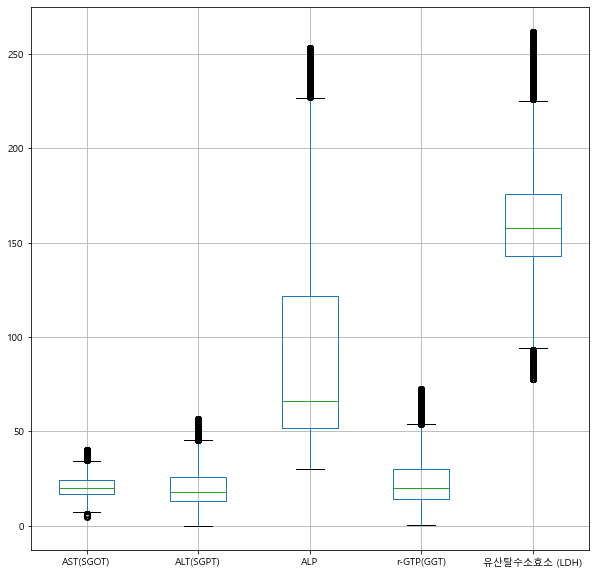

In [85]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [86]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0
1,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0
2,2010,15783,1431,1,41,25.0,19.0,40.0,40.0,NaN
3,2010,15894,2533,2,29,21.0,13.0,104.0,15.0,NaN
4,2011,117186,8998,1,33,29.0,43.0,NaN,NaN,NaN


In [87]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [88]:
len(target_cols)

5

In [89]:
target_cols_direction

[True, True, 'center', True, 'center']

In [90]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
#     df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [91]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

803.93436 sec


## 검진 항목별 가중치 

In [92]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde
272669,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,96.09,102.91,75.15,131.07,8.63
272662,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,121.45,124.08,95.31,93.32,119.19
784427,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,105.04,115.72,146.71,158.47,97.31
64063,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,62.01,17.37,144.75,15.73,100.00
46349,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,47.40,9.74,129.50,12.36,100.00


In [93]:
target_cols_kde

['AST(SGOT)_kde',
 'ALT(SGPT)_kde',
 'ALP_kde',
 'r-GTP(GGT)_kde',
 '유산탈수소효소 (LDH)_kde']

In [94]:
target_cols_ratio

[4, 4, 2, 4, 2]

In [95]:
sum(target_cols_ratio)

16

In [96]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931387 entries, 272669 to 131819
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               931387 non-null  int64  
 1   UID                931387 non-null  int64  
 2   CU_REC_ID          931387 non-null  int64  
 3   SEX                931387 non-null  int64  
 4   검진당시나이             931387 non-null  int64  
 5   AST(SGOT)          925507 non-null  float64
 6   ALT(SGPT)          923808 non-null  float64
 7   ALP                809047 non-null  float64
 8   r-GTP(GGT)         924217 non-null  float64
 9   유산탈수소효소 (LDH)      670049 non-null  float64
 10  AST(SGOT)_kde      931387 non-null  float64
 11  ALT(SGPT)_kde      931387 non-null  float64
 12  ALP_kde            931387 non-null  float64
 13  r-GTP(GGT)_kde     931387 non-null  float64
 14  유산탈수소효소 (LDH)_kde  931387 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 113.7 M

In [97]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])
    + (target_cols_ratio[3] * df_target[target_cols_kde[3]])
    + (target_cols_ratio[4] * df_target[target_cols_kde[4]])
) / sum(target_cols_ratio)

In [98]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [99]:
df_target['kde_mean'].min()

1.93

In [100]:
df_target['kde_mean'].max()

182.95

In [101]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean
count,931387.000000,9.313870e+05,9.313870e+05,931387.000000,931387.000000,925507.000000,923808.000000,809047.000000,924217.000000,670049.000000,931387.000000,931387.000000,931387.000000,931387.000000,931387.000000,931387.000000
mean,2021.947973,5.165656e+05,1.528385e+06,1.419183,40.332674,21.135827,20.501256,90.269413,23.991572,161.378198,87.886410,82.141971,92.926196,78.752534,102.567048,86.631891
std,1.666126,3.696495e+05,7.870527e+05,0.493426,8.983485,5.691811,10.108023,54.530644,13.652207,27.351379,39.971679,40.778606,48.583977,40.589624,37.080662,26.316051
min,2010.000000,4.800000e+01,2.530000e+02,1.000000,20.000000,4.700000,0.000000,30.000000,0.390000,78.000000,0.030000,0.000000,0.180000,0.000000,0.000000,1.930000
25%,2021.000000,2.229510e+05,7.104575e+05,1.000000,33.000000,17.000000,13.000000,52.000000,14.000000,143.000000,62.070000,51.810000,34.250000,45.210000,93.130000,68.610000
50%,2022.000000,3.845870e+05,1.518900e+06,1.000000,40.000000,20.000000,18.000000,66.000000,20.000000,158.000000,95.760000,91.010000,100.000000,88.830000,100.000000,88.300000
75%,2023.000000,8.448755e+05,2.196734e+06,2.000000,47.000000,24.000000,26.000000,122.000000,30.000000,176.000000,106.180000,103.560000,138.850000,102.250000,134.640000,104.830000
max,2024.000000,1.473645e+06,2.871445e+06,2.000000,69.000000,40.200000,56.500000,253.000000,72.500000,262.000000,200.000000,199.990000,150.070000,199.990000,150.030000,182.950000


<AxesSubplot:>

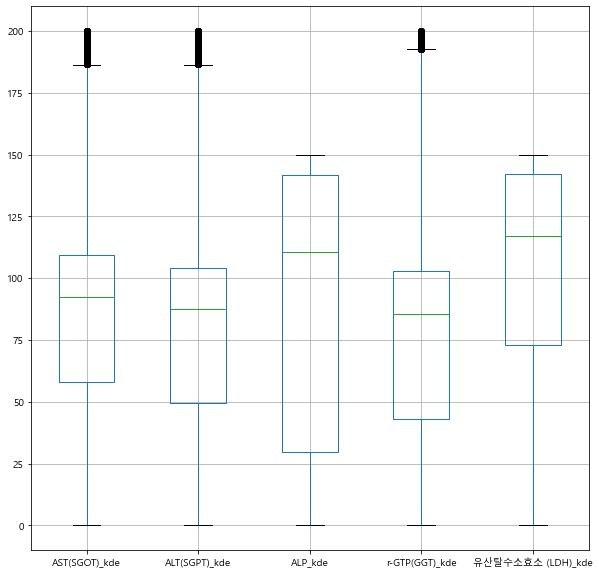

In [102]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=[
 'AST(SGOT)_kde',
 'ALT(SGPT)_kde',
 'ALP_kde',
 'r-GTP(GGT)_kde',
 '유산탈수소효소 (LDH)_kde',])

<AxesSubplot:>

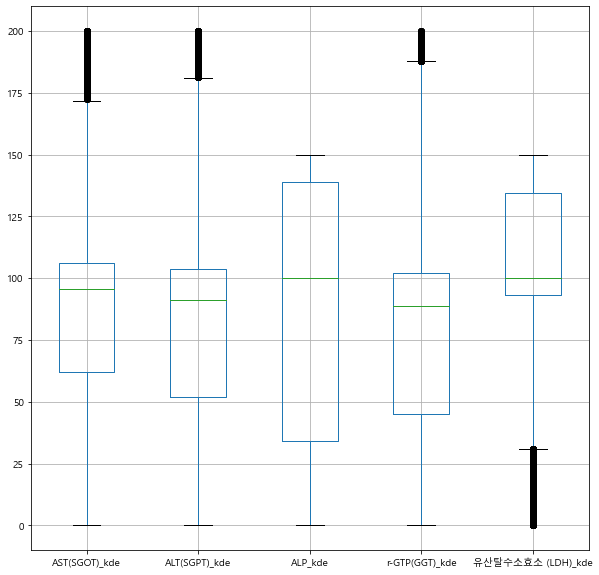

In [103]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=[
 'AST(SGOT)_kde',
 'ALT(SGPT)_kde',
 'ALP_kde',
 'r-GTP(GGT)_kde',
 '유산탈수소효소 (LDH)_kde',])

<AxesSubplot:>

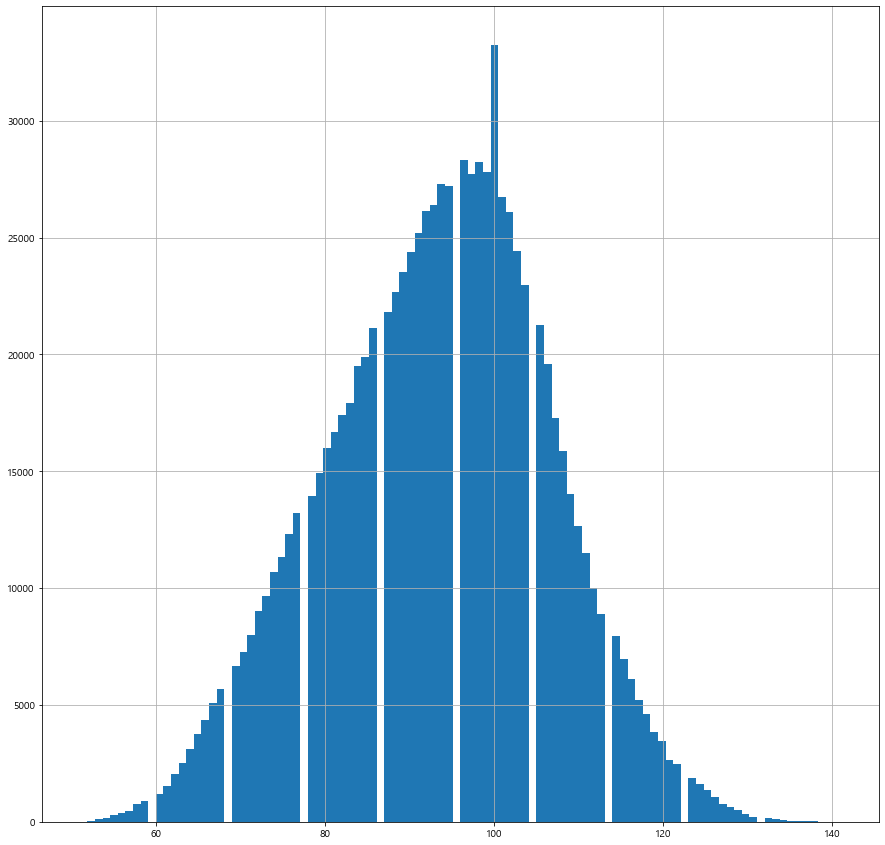

In [159]:
df_boxplot['target'].hist(bins=100)

## target Scaling

In [104]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [105]:
df_target['target'] = (df_target['target'] * 100) + 50

In [106]:
df_target['target'] = df_target['target'].round(0)

In [107]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
87,51.0,7
83,52.0,53
80,53.0,120
77,54.0,180
75,55.0,298
73,56.0,356
72,57.0,459
69,58.0,750
67,59.0,883
65,60.0,1170


In [108]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
count,931387.000000,9.313870e+05,9.313870e+05,931387.000000,931387.000000,925507.000000,923808.000000,809047.000000,924217.000000,670049.000000,931387.000000,931387.000000,931387.000000,931387.000000,931387.000000,931387.000000,931387.000000
mean,2021.947973,5.165656e+05,1.528385e+06,1.419183,40.332674,21.135827,20.501256,90.269413,23.991572,161.378198,87.886410,82.141971,92.926196,78.752534,102.567048,86.631891,93.316323
std,1.666126,3.696495e+05,7.870527e+05,0.493426,8.983485,5.691811,10.108023,54.530644,13.652207,27.351379,39.971679,40.778606,48.583977,40.589624,37.080662,26.316051,13.160900
min,2010.000000,4.800000e+01,2.530000e+02,1.000000,20.000000,4.700000,0.000000,30.000000,0.390000,78.000000,0.030000,0.000000,0.180000,0.000000,0.000000,1.930000,51.000000
25%,2021.000000,2.229510e+05,7.104575e+05,1.000000,33.000000,17.000000,13.000000,52.000000,14.000000,143.000000,62.070000,51.810000,34.250000,45.210000,93.130000,68.610000,84.000000
50%,2022.000000,3.845870e+05,1.518900e+06,1.000000,40.000000,20.000000,18.000000,66.000000,20.000000,158.000000,95.760000,91.010000,100.000000,88.830000,100.000000,88.300000,94.000000
75%,2023.000000,8.448755e+05,2.196734e+06,2.000000,47.000000,24.000000,26.000000,122.000000,30.000000,176.000000,106.180000,103.560000,138.850000,102.250000,134.640000,104.830000,102.000000
max,2024.000000,1.473645e+06,2.871445e+06,2.000000,69.000000,40.200000,56.500000,253.000000,72.500000,262.000000,200.000000,199.990000,150.070000,199.990000,150.030000,182.950000,141.000000


<AxesSubplot:>

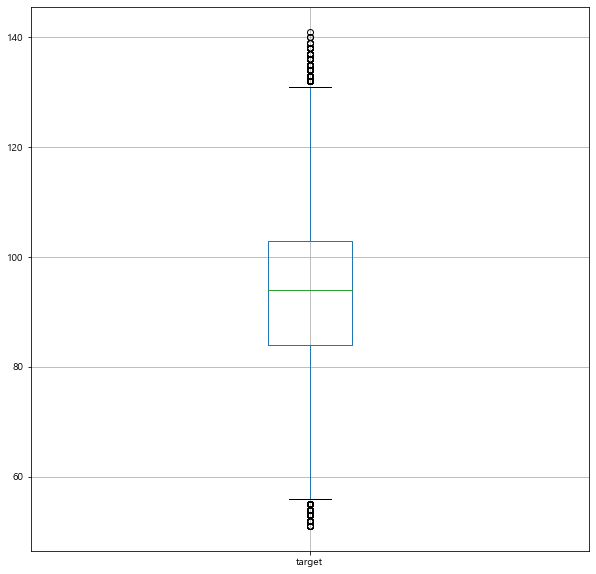

In [109]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

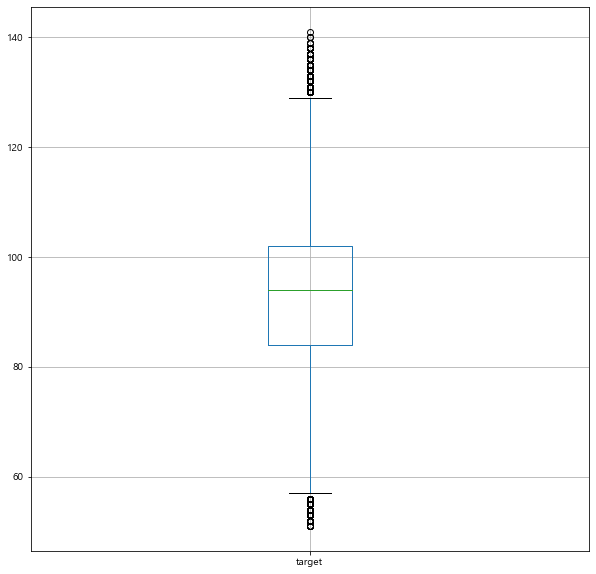

In [110]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.boxplot(column=['target'])

## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

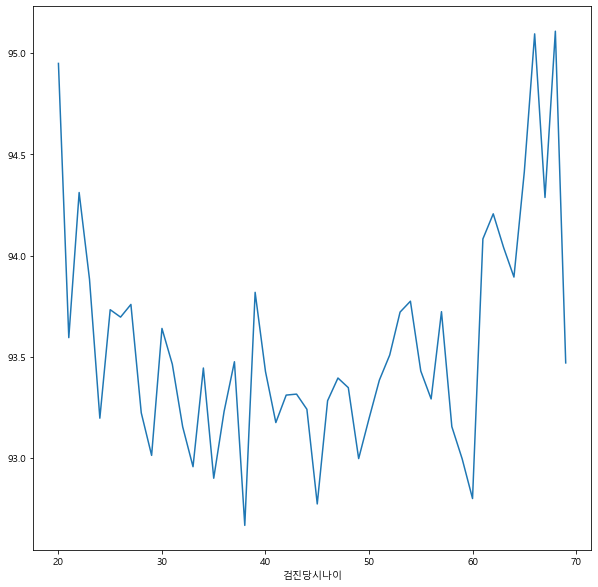

In [111]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

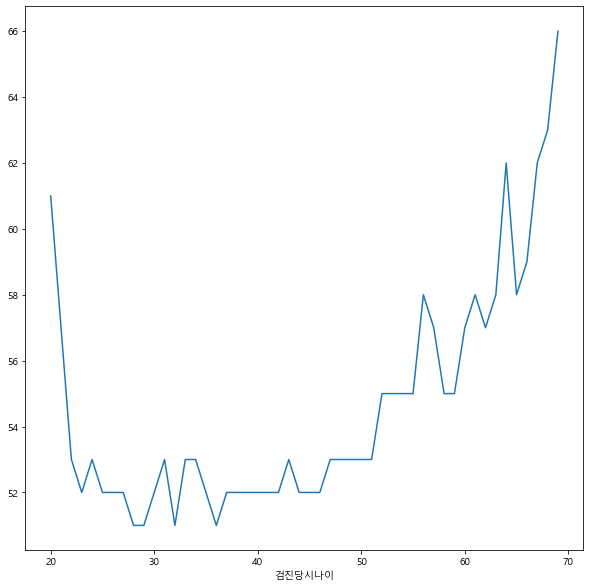

In [112]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

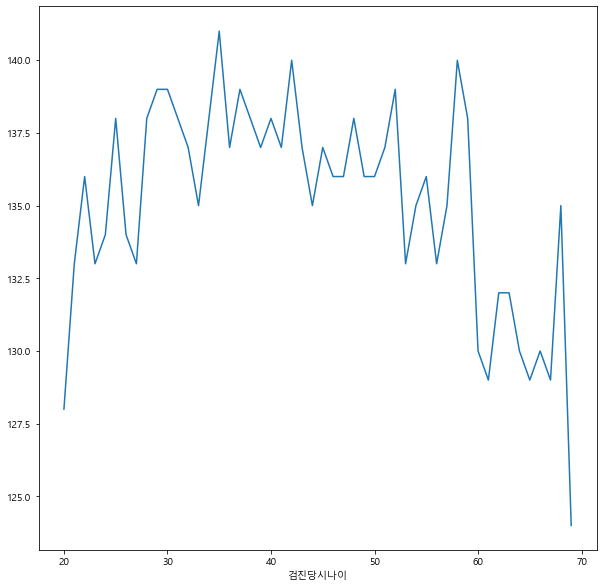

In [113]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [114]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
272669,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,96.09,102.91,75.15,131.07,8.63,92.99,96.0
272662,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,121.45,124.08,95.31,93.32,119.19,111.52,106.0
784427,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,105.04,115.72,146.71,158.47,97.31,125.31,113.0
64063,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,62.01,17.37,144.75,15.73,100.00,54.37,77.0
46349,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,47.40,9.74,129.50,12.36,100.00,46.06,73.0


# 결측행 제거

In [115]:
# df_result.dropna(axis=0).info()

In [116]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [117]:
df_target['SEX'].value_counts()

1    540965
2    390422
Name: SEX, dtype: int64

In [118]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

540965

In [119]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
272669,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,96.09,102.91,75.15,131.07,8.63,92.99,96.0
272662,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,121.45,124.08,95.31,93.32,119.19,111.52,106.0
64063,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,62.01,17.37,144.75,15.73,100.00,54.37,77.0
46349,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,47.40,9.74,129.50,12.36,100.00,46.06,73.0
33306,2010,209421,438,1,29,27.0,16.0,44.0,20.0,NaN,37.94,100.93,101.11,93.09,100.00,83.13,92.0


# 결측치 처리

## 결측치 삭제

In [120]:
# df_man.dropna(inplace=True)

In [121]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
272669,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,96.09,102.91,75.15,131.07,8.63,92.99,96.0
272662,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,121.45,124.08,95.31,93.32,119.19,111.52,106.0
64063,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,62.01,17.37,144.75,15.73,100.00,54.37,77.0
46349,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,47.40,9.74,129.50,12.36,100.00,46.06,73.0
33306,2010,209421,438,1,29,27.0,16.0,44.0,20.0,NaN,37.94,100.93,101.11,93.09,100.00,83.13,92.0


## 결측치 평균으로 대체

In [122]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [123]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [124]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [125]:
len(df_man)

540965

In [126]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [127]:
len(df_man)

537423

In [128]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
272669,2010,605512,253,1,42,22.0,17.0,40.0,14.0,233.0,96.09,102.91,75.15,131.07,8.63,92.99,96.0
272662,2010,439297,328,1,42,17.0,14.0,44.0,24.0,172.0,121.45,124.08,95.31,93.32,119.19,111.52,106.0
64063,2010,171280,431,1,31,25.0,40.0,55.0,49.0,NaN,62.01,17.37,144.75,15.73,100.00,54.37,77.0
46349,2010,295306,436,1,30,27.0,47.0,50.0,47.0,NaN,47.40,9.74,129.50,12.36,100.00,46.06,73.0
33306,2010,209421,438,1,29,27.0,16.0,44.0,20.0,NaN,37.94,100.93,101.11,93.09,100.00,83.13,92.0


## fillna

In [129]:
df_man.mean().round(2)

검진년도                    2021.99
UID                   523753.22
CU_REC_ID            1538392.08
SEX                        1.00
검진당시나이                    41.87
AST(SGOT)                 22.63
ALT(SGPT)                 24.52
ALP                       95.90
r-GTP(GGT)                29.35
유산탈수소효소 (LDH)            164.02
AST(SGOT)_kde             87.91
ALT(SGPT)_kde             81.72
ALP_kde                   93.19
r-GTP(GGT)_kde            77.28
유산탈수소효소 (LDH)_kde        103.50
kde_mean                  86.31
target                    93.16
dtype: float64

In [130]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [131]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [132]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [133]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [134]:
len(df_man)

537423

# 중복 제거

In [135]:
len(df_man)

537423

In [136]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [137]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
230325,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.00,82.14,34.54,25.77,89.46,149.90,73.49,87.0
254384,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.00,100.00,74.91,28.42,92.51,148.95,89.03,95.0
276414,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.00,96.09,74.28,27.24,83.29,149.32,85.49,93.0
298847,2022,62,1356310,1,43,18.0,20.0,59.0,20.0,151.00,103.43,98.71,149.11,100.93,140.62,111.98,106.0
321648,2023,62,2170394,1,44,25.0,37.0,61.0,22.0,149.00,70.42,36.03,149.50,99.00,136.54,87.12,94.0
482794,2022,67,1249745,1,54,28.0,33.0,95.9,41.0,185.00,55.53,43.82,100.00,41.83,85.23,58.45,79.0
452740,2022,76,1377275,1,52,19.0,20.0,58.0,21.0,164.02,109.36,99.50,146.64,100.98,100.00,108.29,104.0
452739,2022,76,1359161,1,52,19.0,20.0,58.0,21.0,164.02,109.36,99.50,146.64,100.98,100.00,108.29,104.0
13781,2021,77,621118,1,27,15.0,17.0,67.0,26.0,140.00,140.64,100.86,139.29,62.11,108.61,106.89,103.0
25100,2022,77,1047599,1,28,20.0,20.0,86.0,23.0,170.00,95.35,83.96,70.10,80.60,124.30,89.28,95.0


In [138]:
len(df_man)

537423

In [139]:
df_man[target_cols]

,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
230325,24.0,37.0,168.0,25.0,156.00
254384,20.0,25.0,162.0,25.0,164.00
276414,22.0,27.0,152.0,27.0,152.00
298847,18.0,20.0,59.0,20.0,151.00
321648,25.0,37.0,61.0,22.0,149.00
...,...,...,...,...,...
41741,19.0,14.0,58.0,17.0,176.00
223688,21.0,31.0,95.9,28.0,164.02
9690,15.0,13.0,83.0,21.0,166.00
473841,15.0,11.0,49.0,12.0,118.00


## first만 남겨두고 중복 제거

In [140]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [141]:
len(df_man)

450776

In [142]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
230325,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.00,82.14,34.54,25.77,89.46,149.90,73.49,87.0
254384,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.00,100.00,74.91,28.42,92.51,148.95,89.03,95.0
276414,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.00,96.09,74.28,27.24,83.29,149.32,85.49,93.0
298847,2022,62,1356310,1,43,18.0,20.0,59.0,20.0,151.00,103.43,98.71,149.11,100.93,140.62,111.98,106.0
321648,2023,62,2170394,1,44,25.0,37.0,61.0,22.0,149.00,70.42,36.03,149.50,99.00,136.54,87.12,94.0
482794,2022,67,1249745,1,54,28.0,33.0,95.9,41.0,185.00,55.53,43.82,100.00,41.83,85.23,58.45,79.0
452740,2022,76,1377275,1,52,19.0,20.0,58.0,21.0,164.02,109.36,99.50,146.64,100.98,100.00,108.29,104.0
13781,2021,77,621118,1,27,15.0,17.0,67.0,26.0,140.00,140.64,100.86,139.29,62.11,108.61,106.89,103.0
25100,2022,77,1047599,1,28,20.0,20.0,86.0,23.0,170.00,95.35,83.96,70.10,80.60,124.30,89.28,95.0
40593,2023,77,1739126,1,29,19.0,23.0,95.0,22.0,142.00,100.37,75.52,42.18,81.28,112.94,83.68,92.0


In [143]:
df_man.reset_index(drop=True, inplace=True)

In [144]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,82.14,34.54,25.77,89.46,149.90,73.49,87.0
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.0,100.00,74.91,28.42,92.51,148.95,89.03,95.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.0,96.09,74.28,27.24,83.29,149.32,85.49,93.0
3,2022,62,1356310,1,43,18.0,20.0,59.0,20.0,151.0,103.43,98.71,149.11,100.93,140.62,111.98,106.0
4,2023,62,2170394,1,44,25.0,37.0,61.0,22.0,149.0,70.42,36.03,149.50,99.00,136.54,87.12,94.0


In [145]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450776 entries, 0 to 450775
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               450776 non-null  int64  
 1   UID                450776 non-null  int64  
 2   CU_REC_ID          450776 non-null  int64  
 3   SEX                450776 non-null  int64  
 4   검진당시나이             450776 non-null  int64  
 5   AST(SGOT)          450776 non-null  float64
 6   ALT(SGPT)          450776 non-null  float64
 7   ALP                450776 non-null  float64
 8   r-GTP(GGT)         450776 non-null  float64
 9   유산탈수소효소 (LDH)      450776 non-null  float64
 10  AST(SGOT)_kde      450776 non-null  float64
 11  ALT(SGPT)_kde      450776 non-null  float64
 12  ALP_kde            450776 non-null  float64
 13  r-GTP(GGT)_kde     450776 non-null  float64
 14  유산탈수소효소 (LDH)_kde  450776 non-null  float64
 15  kde_mean           450776 non-null  float64
 16  ta

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

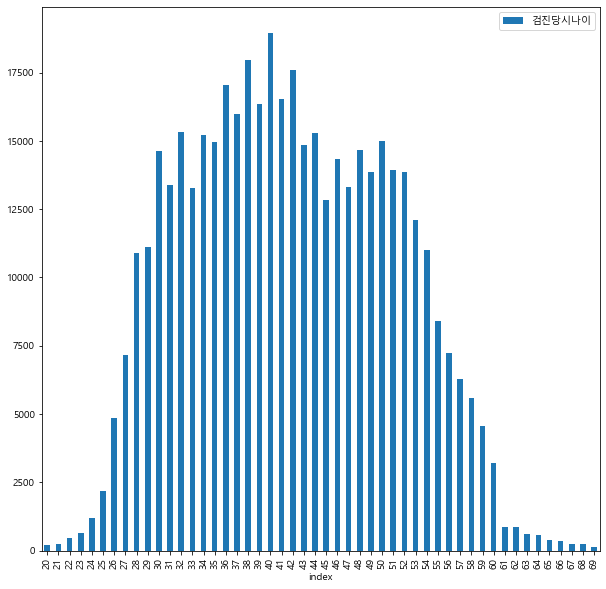

In [146]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [147]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,188
45,21,253
42,22,477
39,23,631
36,24,1188
35,25,2174
32,26,4846
29,27,7148
26,28,10883
24,29,11128


# 검진항목 시각화

In [148]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
count,450776.000000,4.507760e+05,4.507760e+05,450776.0,450776.000000,450776.000000,450776.000000,450776.000000,450776.000000,450776.000000,450776.000000,450776.000000,450776.000000,450776.000000,450776.000000,450776.000000,450776.000000
mean,2021.936991,5.202894e+05,1.538365e+06,1.0,41.802421,22.669699,24.578914,96.884092,29.388890,164.148048,87.637979,81.470686,92.369620,77.095374,103.272545,86.006285,93.002724
std,1.720097,3.702389e+05,8.039623e+05,0.0,9.008403,5.696741,10.142871,53.341895,13.967407,22.777031,39.312707,39.617335,48.697735,39.046112,36.991333,25.538151,12.772272
min,2010.000000,6.200000e+01,2.530000e+02,1.0,20.000000,5.000000,1.000000,30.000000,1.000000,78.000000,1.220000,0.760000,2.200000,0.350000,0.000000,8.070000,54.000000
25%,2021.000000,2.245920e+05,6.930918e+05,1.0,35.000000,19.000000,17.000000,59.000000,19.000000,152.000000,62.070000,51.560000,34.250000,44.090000,94.060000,68.090000,84.000000
50%,2022.000000,3.872960e+05,1.546781e+06,1.0,41.000000,22.000000,22.000000,76.000000,26.000000,164.020000,95.090000,89.320000,100.000000,84.960000,100.000000,86.940000,93.000000
75%,2023.000000,8.495110e+05,2.255101e+06,1.0,49.000000,26.000000,30.000000,109.000000,37.000000,171.000000,105.690000,102.480000,138.210000,100.710000,135.940000,103.680000,102.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,40.200000,56.500000,253.000000,72.500000,262.000000,200.000000,199.980000,150.050000,199.850000,150.030000,179.170000,140.000000


<AxesSubplot:xlabel='검진당시나이'>

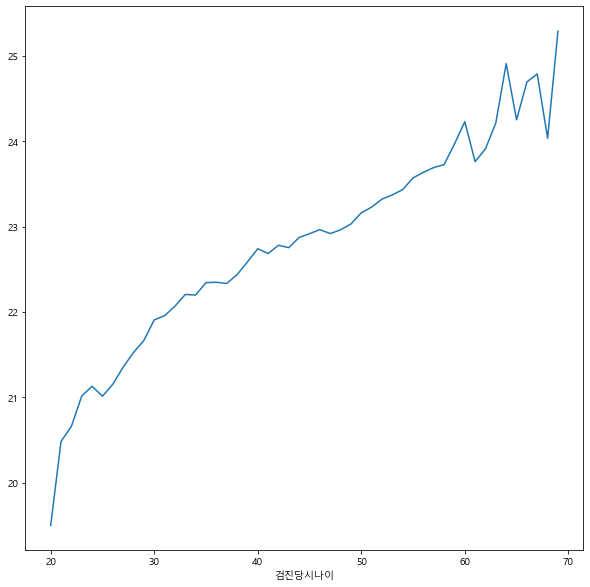

In [149]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

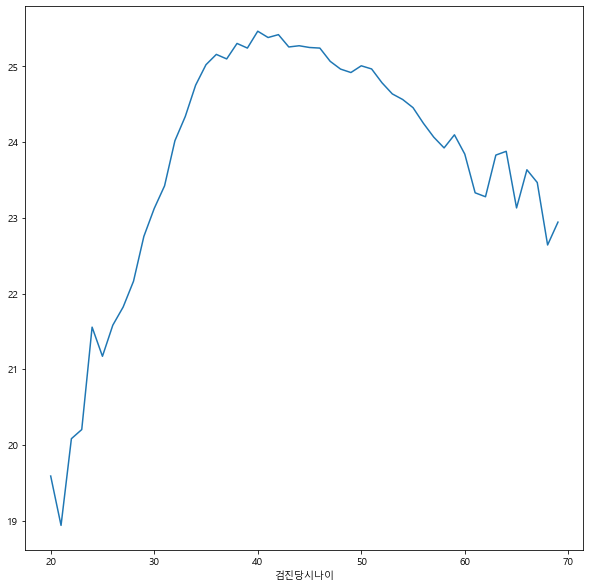

In [150]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

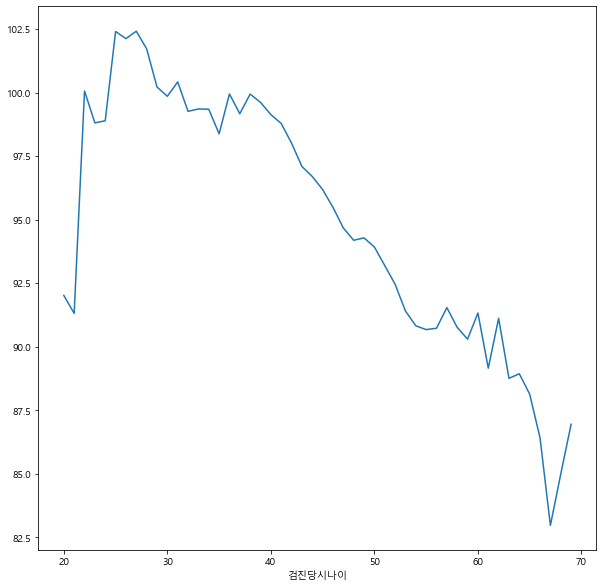

In [151]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

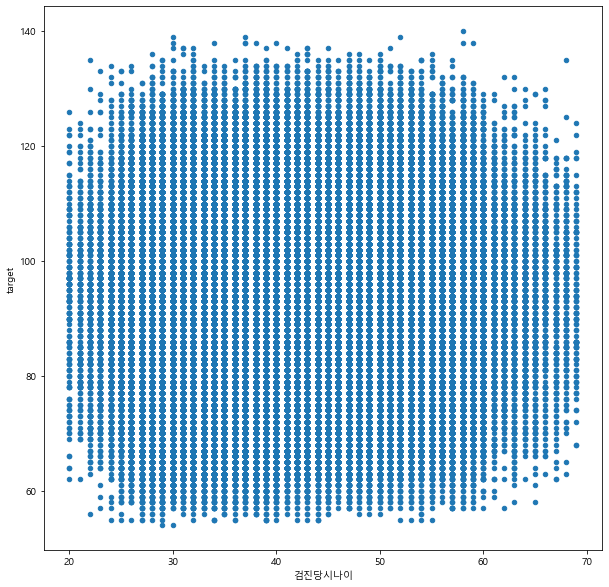

In [152]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

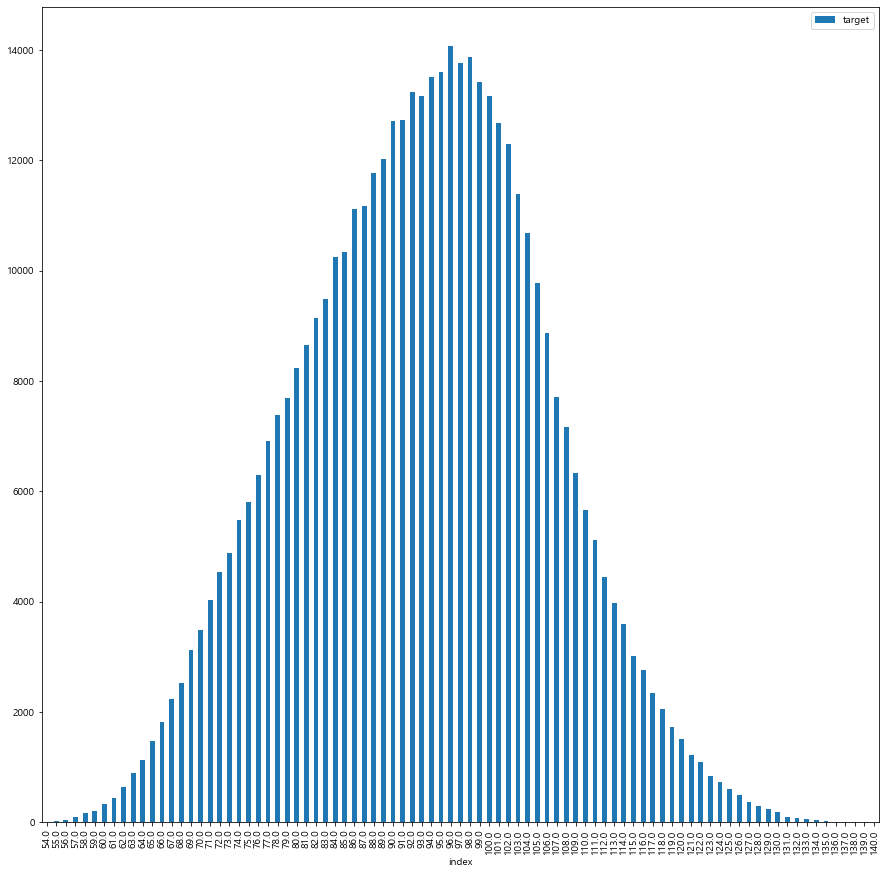

In [153]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [154]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
85,54.0,2
80,55.0,27
78,56.0,40
73,57.0,104
72,58.0,166
70,59.0,212
67,60.0,330
65,61.0,439
62,62.0,635
59,63.0,889


In [155]:
df_man_sampling = pd.DataFrame()

for target in range(50, 100):
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [156]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

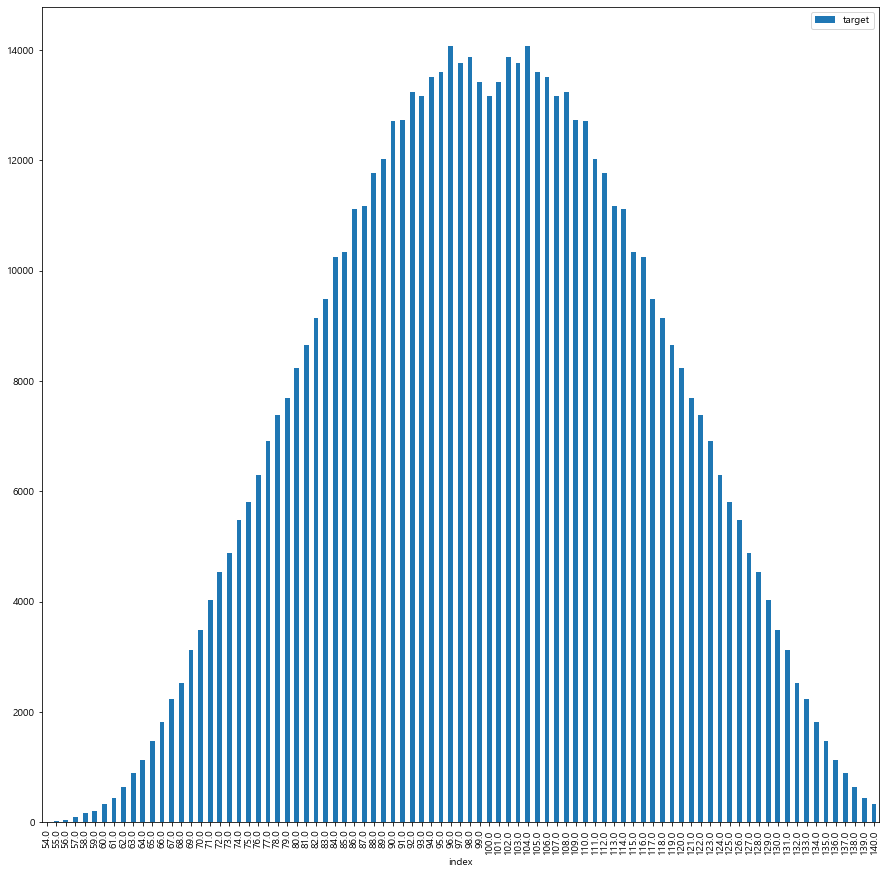

In [157]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [158]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
86,54.0,2
85,55.0,27
84,56.0,40
83,57.0,104
82,58.0,166
81,59.0,212
80,60.0,330
78,61.0,439
76,62.0,635
73,63.0,889


# 나이별 확인하기

In [160]:
# target = 'target'

In [161]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [162]:
# df_man = df_man_sample

In [163]:
# int(df_man['검진당시나이'].value_counts().mean())

In [164]:
# df_man['검진당시나이'].min()

In [165]:
# df_man['검진당시나이'].max()

In [166]:
# df_man.columns

In [167]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [168]:
# df_temp.info()

In [169]:
# df_temp.reset_index(drop=True, inplace=True)

In [170]:
# df_man = df_temp.copy()

In [171]:
# df_man['검진당시나이'].value_counts()

In [172]:
# df_man[df_man['검진당시나이']==38]

In [173]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [174]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', 'AST(SGOT)_kde', 'ALT(SGPT)_kde',
       'ALP_kde', 'r-GTP(GGT)_kde', '유산탈수소효소 (LDH)_kde', 'kde_mean', 'target'],
      dtype='object')

In [175]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [176]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [177]:
train_columns = target_cols.copy()

In [178]:
train_columns.insert(0, '검진당시나이')

In [179]:
train_columns

['검진당시나이', 'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [180]:
target_col = 'target'

## Min Max Scaling

In [181]:
from sklearn.preprocessing import MinMaxScaler

In [182]:
scaling_bool

False

In [183]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [184]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [185]:
# model = LinearRegression()

In [186]:
# model.fit(X_train, y_train)

In [187]:
# model.intercept_

In [188]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [189]:
model = XGBRegressor()

In [190]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [191]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [192]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 2170.52 seconds for 10 candidates parameter settings.


In [193]:
# best parameter
random_search.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [194]:
# best score
random_search.best_score_

-0.29987058863273053

In [195]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Keras

In [196]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [197]:
# model = build_model()

In [198]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [199]:
# model.summary()

In [200]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [201]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [202]:
# plot_history(history)

## pyTorch 신경망

In [203]:
np.shape(X_train)[1]

6

In [204]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [205]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [206]:
# epochs = 1000

In [207]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [208]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [209]:
# plt.plot(losses)

## coef 계산

In [210]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [211]:
# df_coef.columns = ['검사항목', 'coef']

In [212]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [213]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [214]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [215]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [216]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [217]:
# slr = LinearRegression()

In [218]:
# slr.fit(X_train_poly, y_train)

In [219]:
# np.shape(X_train)

In [220]:
# np.shape(X_train_poly)

In [221]:
# np.shape(X_test)

In [222]:
# np.shape(X_test_poly)

In [223]:
# y_pred_poly = slr.predict(X_test_poly)

In [224]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [225]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [226]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [227]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [228]:
pyTorch_bool

False

In [229]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [230]:
XGB_bool

True

In [231]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [232]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.4163484754999747
MSE : 0.2925466639606928
RMSE : 0.5408758304460394


In [233]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9988777398054945

In [234]:
model.score(X_test, y_test)

0.9988777398054945

## feature importance

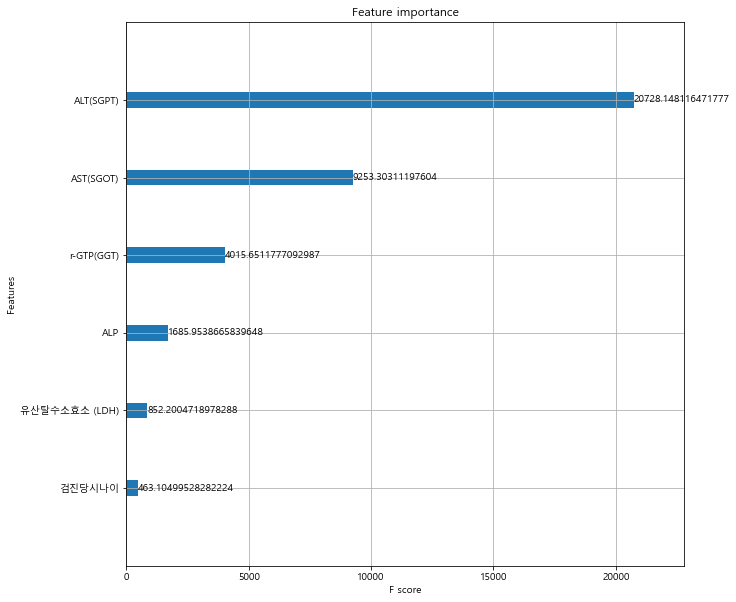

In [235]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [236]:
model.feature_importances_

array([0.01251691, 0.25010034, 0.5602451 , 0.04556834, 0.10853592,
       0.02303347], dtype=float32)

In [237]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [238]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
2,ALT(SGPT),0.560245
1,AST(SGOT),0.250100
4,r-GTP(GGT),0.108536
3,ALP,0.045568
5,유산탈수소효소 (LDH),0.023033
0,검진당시나이,0.012517


# 실제지수 - 예측지수 결과

In [239]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,99.0
1,85.0
2,114.0
3,96.0
4,81.0
...,...
157142,106.0
157143,127.0
157144,68.0
157145,74.0


In [240]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,99.132782
1,83.788635
2,114.437820
3,96.340530
4,81.103607
...,...
157142,106.190796
157143,127.006775
157144,68.305725
157145,74.752907


In [241]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [242]:
df_test.head()

,target,0
0,99.0,99.132782
1,85.0,83.788635
2,114.0,114.437820
3,96.0,96.340530
4,81.0,81.103607


In [243]:
df_test.columns

Index(['target', 0], dtype='object')

In [244]:
df_test.columns = ['실제지수', '예측지수']

In [245]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [246]:
df_test.head()

,실제지수,예측지수,diff
0,99.0,99.132782,0.132782
1,85.0,83.788635,-1.211365
2,114.0,114.437820,0.437820
3,96.0,96.340530,0.340530
4,81.0,81.103607,0.103607


In [247]:
df_test['diff_int'] = df_test['diff'].round(0)

In [248]:
len(df_test)

157147

In [249]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,99.0,99.132782,0.132782,0.0
1,85.0,83.788635,-1.211365,-1.0
2,114.0,114.437820,0.437820,0.0
3,96.0,96.340530,0.340530,0.0
4,81.0,81.103607,0.103607,0.0


<AxesSubplot:>

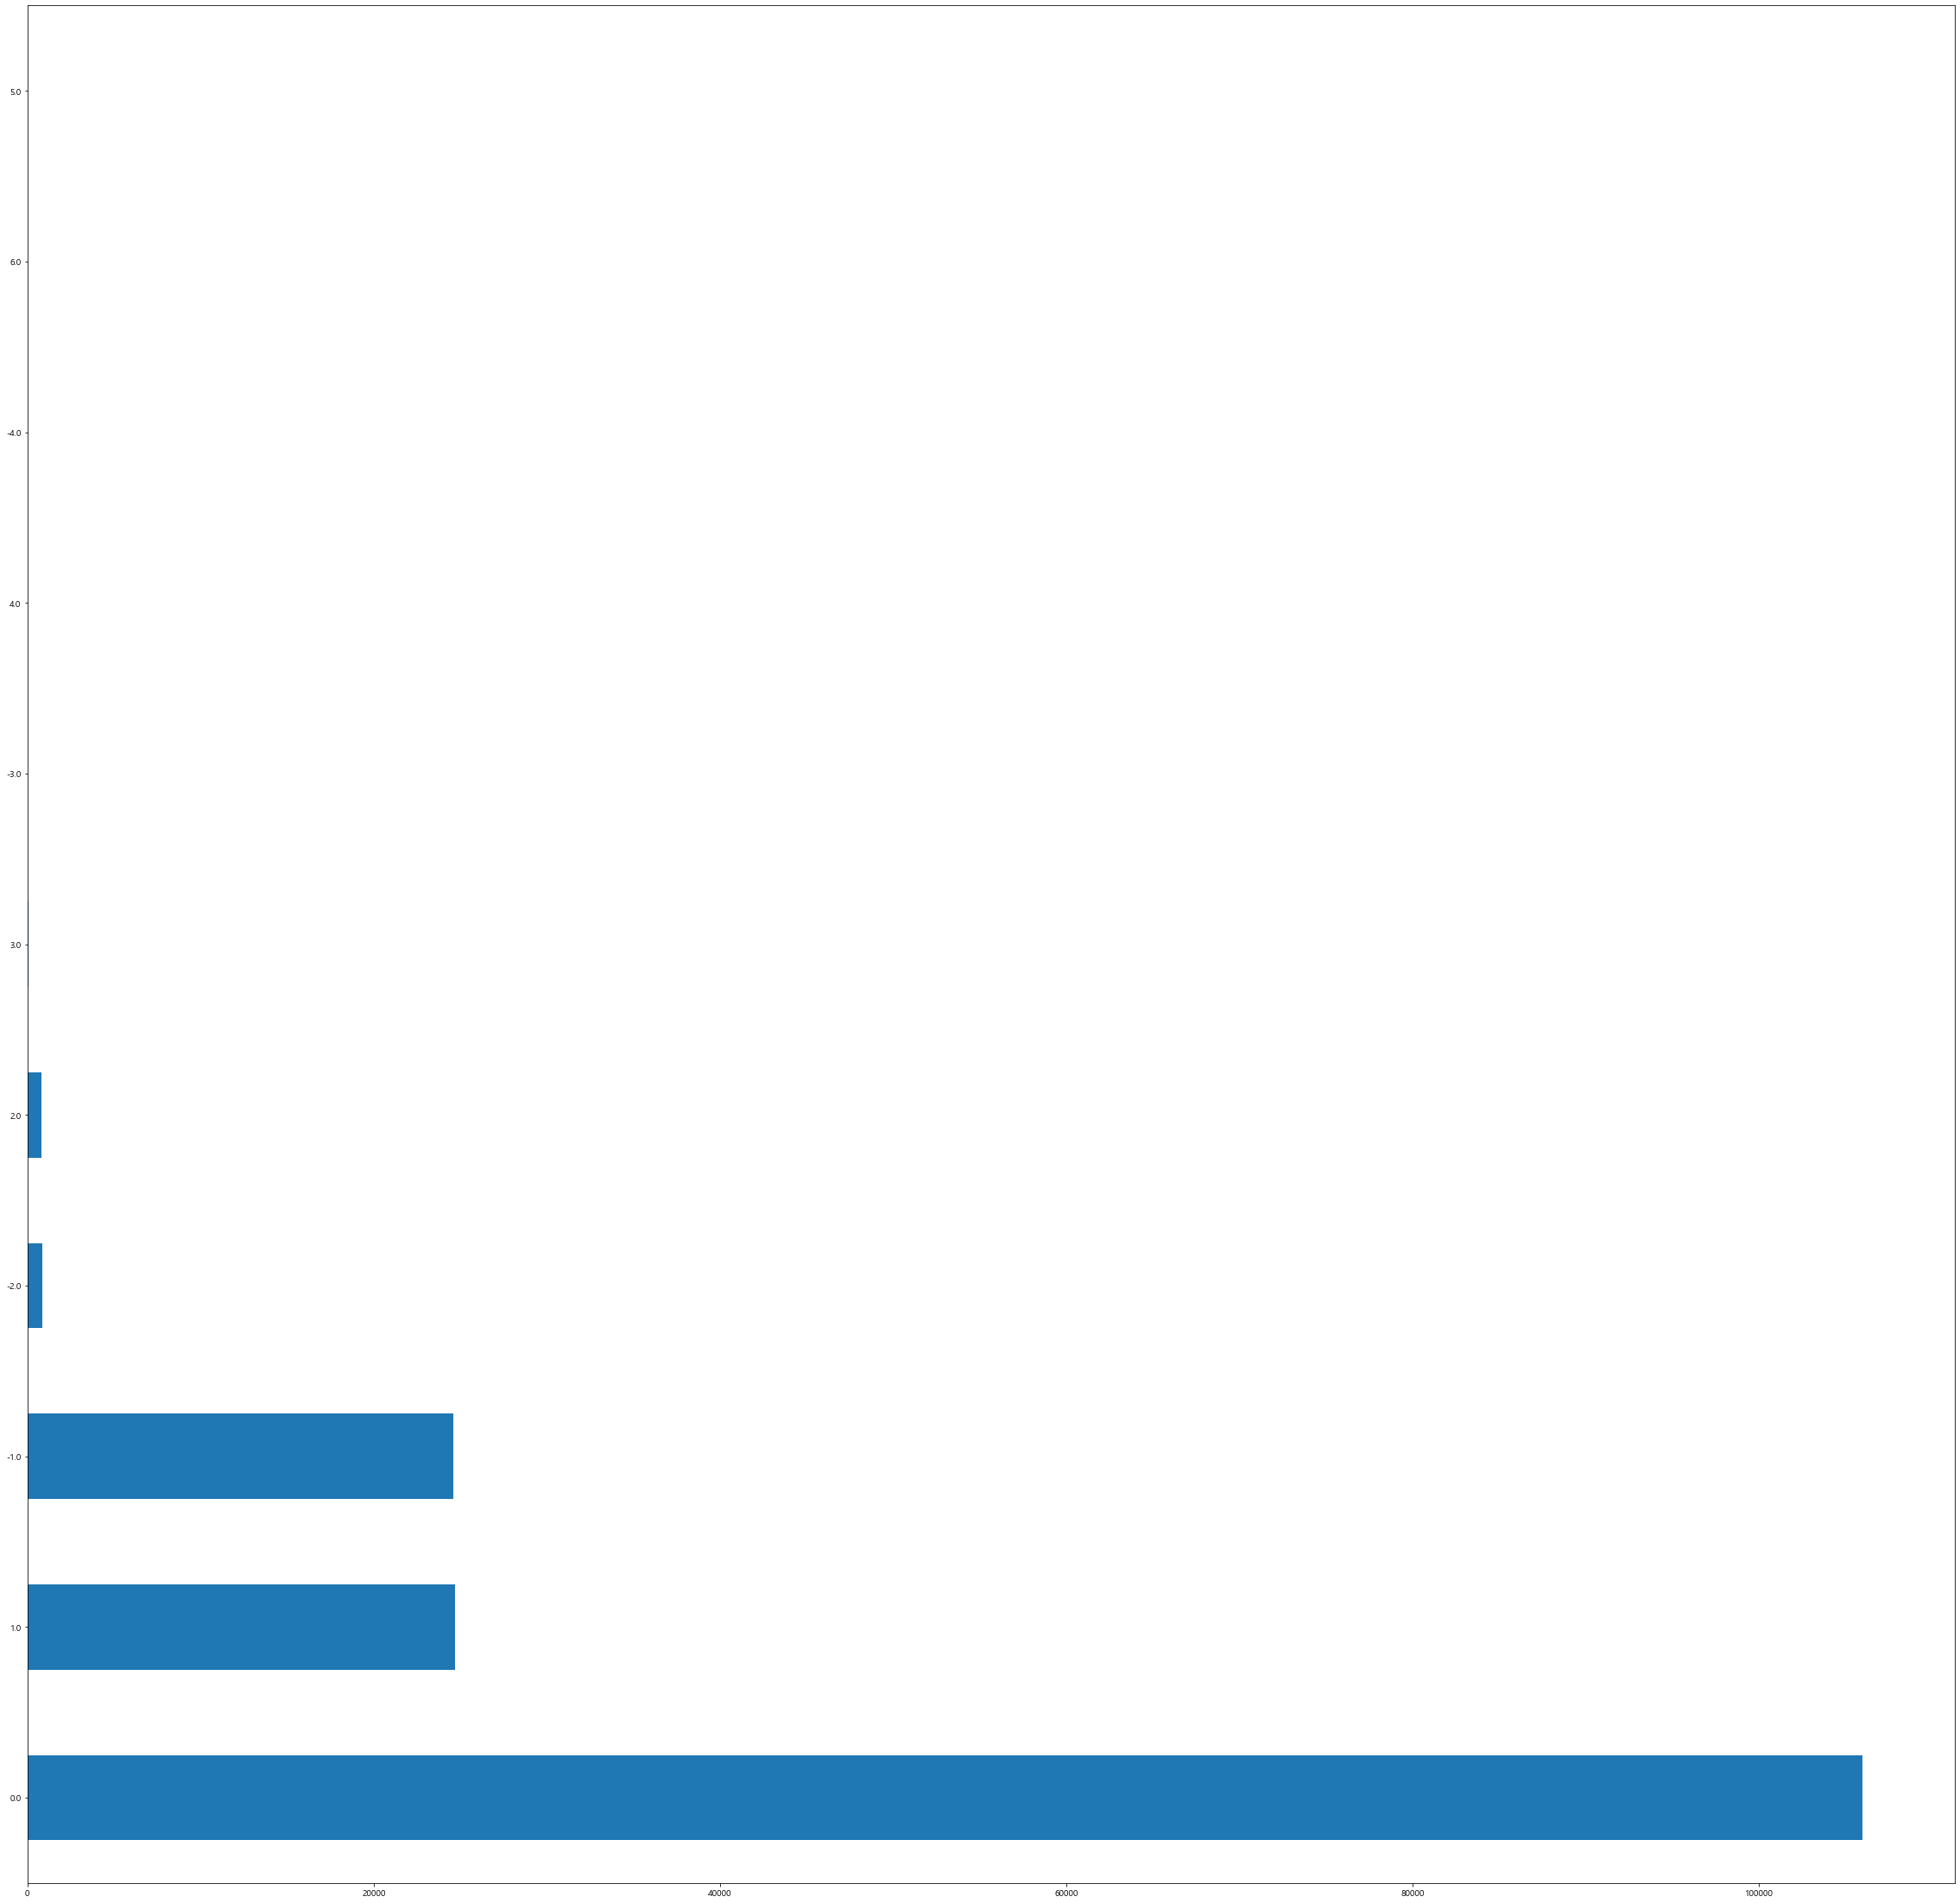

In [250]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [251]:
df_test['diff_int'].value_counts(ascending=False)

 0.0    106006
 1.0     24718
-1.0     24622
-2.0       885
 2.0       816
 3.0        47
-3.0        38
 4.0         8
-4.0         5
 6.0         1
 5.0         1
Name: diff_int, dtype: int64

In [252]:
df_test['예측지수'].round(0).value_counts()

103.0    3512
96.0     3508
105.0    3487
104.0    3473
98.0     3435
102.0    3418
95.0     3413
93.0     3392
99.0     3359
108.0    3346
97.0     3340
107.0    3325
100.0    3318
91.0     3305
106.0    3296
92.0     3282
94.0     3280
101.0    3274
109.0    3208
90.0     3179
111.0    3151
89.0     3104
110.0    3087
88.0     2900
112.0    2884
86.0     2799
113.0    2799
87.0     2734
114.0    2727
85.0     2627
116.0    2580
84.0     2569
115.0    2551
83.0     2381
117.0    2361
118.0    2304
82.0     2256
81.0     2199
119.0    2121
80.0     2063
121.0    1972
120.0    1958
79.0     1925
78.0     1858
122.0    1786
123.0    1714
77.0     1706
124.0    1639
76.0     1608
75.0     1535
125.0    1498
126.0    1301
74.0     1279
73.0     1219
127.0    1198
72.0     1158
128.0    1098
129.0    1067
71.0      985
70.0      918
130.0     840
131.0     834
69.0      816
68.0      665
132.0     643
133.0     556
67.0      531
134.0     448
66.0      435
135.0     378
65.0      361
64.0  

# 예측 나이 분포

In [253]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [254]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [255]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [256]:
df_plot = pd.DataFrame(y_test.value_counts())

In [257]:
df_plot.columns = ['count']

In [258]:
df_plot.reset_index(inplace=True)

In [259]:
df_plot = df_plot.sort_values('index', ascending=True)

In [260]:
df_plot

,index,count
85,55.0,7
84,56.0,12
83,57.0,27
82,58.0,44
81,59.0,56
79,60.0,87
77,61.0,106
76,62.0,158
74,63.0,217
72,64.0,275


In [261]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

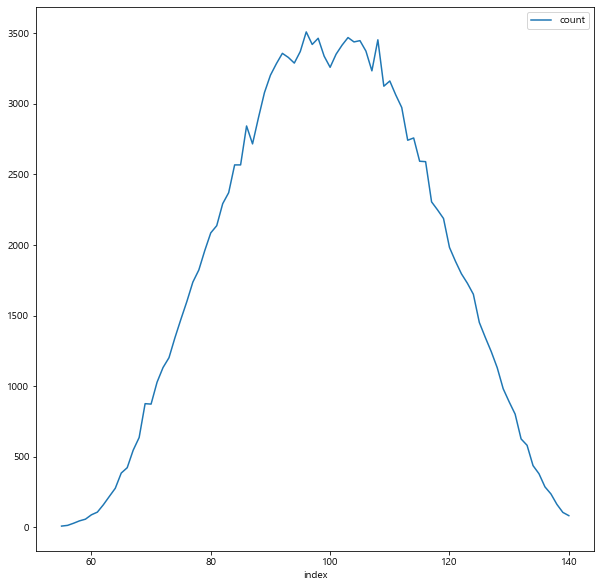

In [262]:
df_plot.plot()

In [263]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [264]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [265]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [266]:
df_plot.columns = ['count']

In [267]:
df_plot.reset_index(inplace=True)

In [268]:
df_plot = df_plot.sort_values(0, ascending=True)

In [269]:
df_plot.set_index(0, inplace=True)

In [270]:
df_plot

,count
0,
55.0,7
56.0,9
57.0,37
58.0,39
59.0,56
60.0,84
61.0,112
62.0,160
63.0,213


<AxesSubplot:xlabel='0'>

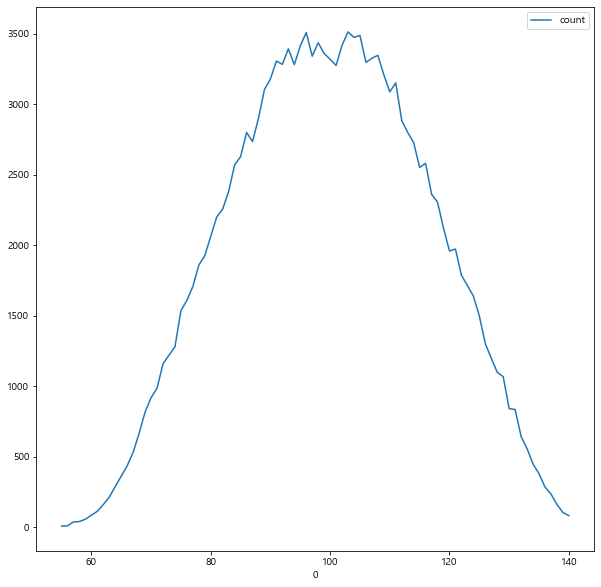

In [271]:
df_plot.plot()

# 시각화

In [272]:
# model.coef_

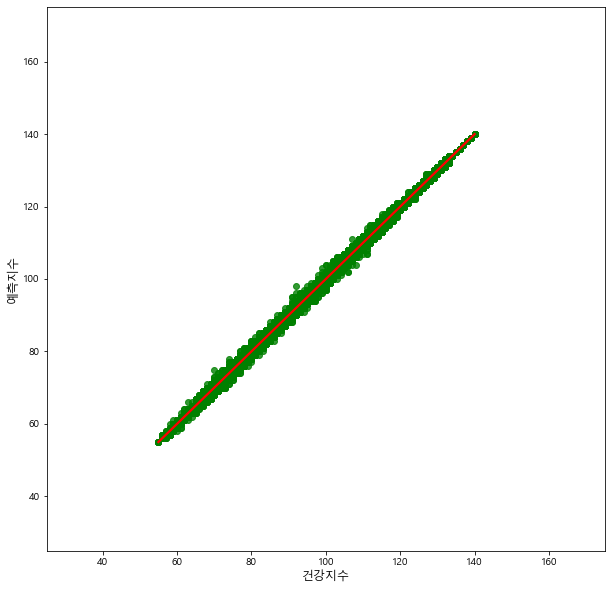

In [273]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [274]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,82.14,34.54,25.77,89.46,149.90,73.49,87.0
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.0,100.00,74.91,28.42,92.51,148.95,89.03,95.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.0,96.09,74.28,27.24,83.29,149.32,85.49,93.0
3,2022,62,1356310,1,43,18.0,20.0,59.0,20.0,151.0,103.43,98.71,149.11,100.93,140.62,111.98,106.0
4,2023,62,2170394,1,44,25.0,37.0,61.0,22.0,149.0,70.42,36.03,149.50,99.00,136.54,87.12,94.0


In [275]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450776 entries, 0 to 450775
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               450776 non-null  int64  
 1   UID                450776 non-null  int64  
 2   CU_REC_ID          450776 non-null  int64  
 3   SEX                450776 non-null  int64  
 4   검진당시나이             450776 non-null  int64  
 5   AST(SGOT)          450776 non-null  float64
 6   ALT(SGPT)          450776 non-null  float64
 7   ALP                450776 non-null  float64
 8   r-GTP(GGT)         450776 non-null  float64
 9   유산탈수소효소 (LDH)      450776 non-null  float64
 10  AST(SGOT)_kde      450776 non-null  float64
 11  ALT(SGPT)_kde      450776 non-null  float64
 12  ALP_kde            450776 non-null  float64
 13  r-GTP(GGT)_kde     450776 non-null  float64
 14  유산탈수소효소 (LDH)_kde  450776 non-null  float64
 15  kde_mean           450776 non-null  float64
 16  ta

In [276]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
68452,2022,168996,2259500,1,35,17.0,13.0,41.0,45.0,179.0,119.02,133.81,86.43,25.54,87.51,91.34,96.0
68453,2023,168996,2259499,1,36,17.0,14.0,50.0,26.0,173.0,117.93,127.13,124.49,78.16,110.75,110.21,105.0


In [277]:
train_columns

['검진당시나이', 'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [278]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [279]:
len(df_pred)

450776

In [280]:
df_pred.reset_index(drop=True, inplace=True)

In [281]:
X_test

,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
338758,39,24.0,16.0,81.0,27.0,164.00
338311,56,26.0,40.0,60.0,28.0,197.00
140382,56,14.0,13.0,45.0,20.0,164.02
152853,38,20.0,18.0,47.0,24.0,128.00
448008,26,24.0,23.0,69.0,33.0,193.00
...,...,...,...,...,...,...
291002,49,17.0,14.0,95.9,27.0,164.02
352261,42,14.0,10.0,62.0,11.0,132.00
295665,38,36.0,29.0,203.0,60.0,184.00
443338,36,37.0,46.0,95.9,29.0,164.02


In [282]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', 'AST(SGOT)_kde', 'ALT(SGPT)_kde',
       'ALP_kde', 'r-GTP(GGT)_kde', '유산탈수소효소 (LDH)_kde', 'kde_mean', 'target'],
      dtype='object')

In [283]:
df_pred[train_columns]

,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,40,24.0,37.0,168.0,25.0,156.00
1,41,20.0,25.0,162.0,25.0,164.00
2,42,22.0,27.0,152.0,27.0,152.00
3,43,18.0,20.0,59.0,20.0,151.00
4,44,25.0,37.0,61.0,22.0,149.00
...,...,...,...,...,...,...
450771,29,19.0,14.0,58.0,17.0,176.00
450772,39,21.0,31.0,95.9,28.0,164.02
450773,26,15.0,13.0,83.0,21.0,166.00
450774,53,15.0,11.0,49.0,12.0,118.00


In [284]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [285]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [286]:
pred_data = pred_data.round(0)

In [287]:
pred_data

array([ 87.,  94.,  93., ..., 104., 120.,  69.], dtype=float32)

In [288]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [289]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [290]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.00,82.14,34.54,25.77,89.46,149.90,73.49,87.0,87.0
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.00,100.00,74.91,28.42,92.51,148.95,89.03,95.0,94.0
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.00,96.09,74.28,27.24,83.29,149.32,85.49,93.0,93.0
3,2022,62,1356310,1,43,18.0,20.0,59.0,20.0,151.00,103.43,98.71,149.11,100.93,140.62,111.98,106.0,106.0
4,2023,62,2170394,1,44,25.0,37.0,61.0,22.0,149.00,70.42,36.03,149.50,99.00,136.54,87.12,94.0,94.0
5,2022,67,1249745,1,54,28.0,33.0,95.9,41.0,185.00,55.53,43.82,100.00,41.83,85.23,58.45,79.0,79.0
6,2022,76,1377275,1,52,19.0,20.0,58.0,21.0,164.02,109.36,99.50,146.64,100.98,100.00,108.29,104.0,104.0
7,2021,77,621118,1,27,15.0,17.0,67.0,26.0,140.00,140.64,100.86,139.29,62.11,108.61,106.89,103.0,104.0
8,2022,77,1047599,1,28,20.0,20.0,86.0,23.0,170.00,95.35,83.96,70.10,80.60,124.30,89.28,95.0,95.0
9,2023,77,1739126,1,29,19.0,23.0,95.0,22.0,142.00,100.37,75.52,42.18,81.28,112.94,83.68,92.0,92.0


## 예측지수 성능평가

In [291]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.36748185351482776

# target으로 나이 계산

In [292]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [293]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.00,82.14,34.54,25.77,89.46,149.90,73.49,87.0,87.0,42.6
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.00,100.00,74.91,28.42,92.51,148.95,89.03,95.0,94.0,42.2
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.00,96.09,74.28,27.24,83.29,149.32,85.49,93.0,93.0,43.4
3,2022,62,1356310,1,43,18.0,20.0,59.0,20.0,151.00,103.43,98.71,149.11,100.93,140.62,111.98,106.0,106.0,41.8
4,2023,62,2170394,1,44,25.0,37.0,61.0,22.0,149.00,70.42,36.03,149.50,99.00,136.54,87.12,94.0,94.0,45.2
5,2022,67,1249745,1,54,28.0,33.0,95.9,41.0,185.00,55.53,43.82,100.00,41.83,85.23,58.45,79.0,79.0,58.2
6,2022,76,1377275,1,52,19.0,20.0,58.0,21.0,164.02,109.36,99.50,146.64,100.98,100.00,108.29,104.0,104.0,51.2
7,2021,77,621118,1,27,15.0,17.0,67.0,26.0,140.00,140.64,100.86,139.29,62.11,108.61,106.89,103.0,104.0,26.2
8,2022,77,1047599,1,28,20.0,20.0,86.0,23.0,170.00,95.35,83.96,70.10,80.60,124.30,89.28,95.0,95.0,29.0
9,2023,77,1739126,1,29,19.0,23.0,95.0,22.0,142.00,100.37,75.52,42.18,81.28,112.94,83.68,92.0,92.0,30.6


## 예측나이 성능평가

In [294]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

2.323762578309404

# 최종 산출

In [295]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2019,62,421626,1,40,24.0,37.0,168.0,25.0,156.0,82.14,34.54,25.77,89.46,149.90,73.49,87.0,87.0,42.6
1,2020,62,565527,1,41,20.0,25.0,162.0,25.0,164.0,100.00,74.91,28.42,92.51,148.95,89.03,95.0,94.0,42.2
2,2021,62,699357,1,42,22.0,27.0,152.0,27.0,152.0,96.09,74.28,27.24,83.29,149.32,85.49,93.0,93.0,43.4
3,2022,62,1356310,1,43,18.0,20.0,59.0,20.0,151.0,103.43,98.71,149.11,100.93,140.62,111.98,106.0,106.0,41.8
4,2023,62,2170394,1,44,25.0,37.0,61.0,22.0,149.0,70.42,36.03,149.50,99.00,136.54,87.12,94.0,94.0,45.2


In [296]:
# df_output.to_csv('man.csv')

# DataMart csv

In [297]:
df_copy = df.copy()

In [298]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0
1,2010,7490,3638,1,39,25.0,40.0,164.0,65.0,298.0
2,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0
3,2010,8056,4745,1,42,33.0,39.0,165.0,157.0,315.0
4,2010,8457,3929,1,38,28.0,18.0,147.0,27.0,350.0


In [299]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   검진년도           1213899 non-null  int64  
 1   UID            1213899 non-null  int64  
 2   CU_REC_ID      1213899 non-null  int64  
 3   SEX            1213899 non-null  int64  
 4   검진당시나이         1213899 non-null  int64  
 5   AST(SGOT)      1207991 non-null  float64
 6   ALT(SGPT)      1206200 non-null  float64
 7   ALP            1073547 non-null  float64
 8   r-GTP(GGT)     1206626 non-null  float64
 9   유산탈수소효소 (LDH)  907336 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 92.6 MB


In [300]:
minimums

[4.5, -11.5, -67.0, -19.5, 78.0]

In [301]:
maximums

[40.5, 56.5, 253.0, 72.5, 262.0]

In [302]:
train_columns

['검진당시나이', 'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [303]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [304]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [305]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [306]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0
1,2010,7490,3638,1,39,25.0,40.0,164.0,65.0,262.0
2,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0
3,2010,8056,4745,1,42,33.0,39.0,165.0,72.5,262.0
4,2010,8457,3929,1,38,28.0,18.0,147.0,27.0,262.0


## 검진 항목 all 결측치 지우기

In [307]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [308]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [309]:
df_man_csv.reset_index(drop=True, inplace=True)

In [310]:
len(df_man_csv)

761917

## fillna

In [311]:
df_man.mean().round(2)

검진년도                    2021.94
UID                   520289.36
CU_REC_ID            1538365.19
SEX                        1.00
검진당시나이                    41.80
AST(SGOT)                 22.67
ALT(SGPT)                 24.58
ALP                       96.88
r-GTP(GGT)                29.39
유산탈수소효소 (LDH)            164.15
AST(SGOT)_kde             87.64
ALT(SGPT)_kde             81.47
ALP_kde                   92.37
r-GTP(GGT)_kde            77.10
유산탈수소효소 (LDH)_kde        103.27
kde_mean                  86.01
target                    93.00
dtype: float64

In [312]:
df_man_csv.mean().round(2)

검진년도                2021.91
UID               514669.84
CU_REC_ID        1497471.87
SEX                    1.00
검진당시나이                42.03
AST(SGOT)             25.15
ALT(SGPT)             29.07
ALP                  102.06
r-GTP(GGT)            35.77
유산탈수소효소 (LDH)        179.79
dtype: float64

In [313]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## ALP 스크리닝

In [314]:
screening = 30

In [315]:
df_man_csv[df_man_csv['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
672,2010,617164,2000,1,37,22.0,19.0,1.2,19.0,262.0
1822,2011,605943,7055,1,43,26.0,39.0,25.0,33.0,262.0
1891,2011,617643,5180,1,38,20.0,20.0,20.0,20.0,262.0
4040,2015,488271,79775,1,44,22.0,15.0,29.0,13.0,124.0
6064,2016,632956,110059,1,37,24.0,56.5,27.0,7.2,108.0


In [316]:
len(df_man_csv[df_man_csv['ALP'] < screening])

2519

In [317]:
df_man_csv.loc[df_man_csv['ALP'] < screening, 'ALP'] = screening

In [318]:
df_man_csv[df_man_csv['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)


In [319]:
len(df_man_csv[df_man_csv['ALP'] < screening])

0

In [320]:
len(df_man_csv)

761917

## 모델 예측

In [321]:
train_columns

['검진당시나이', 'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [322]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [323]:
pred_data = pred_data.round(0)

In [324]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [325]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0,104.0
1,2010,7490,3638,1,39,25.0,40.0,164.0,65.0,262.0,66.0
2,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0,80.0
3,2010,8056,4745,1,42,33.0,39.0,165.0,72.5,262.0,59.0
4,2010,8457,3929,1,38,28.0,18.0,147.0,27.0,262.0,80.0


### 성능 평가

In [326]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [327]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [328]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [329]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 3.2318761754889325


In [330]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.7943467870961276

In [331]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0,104.0,41.2
1,2010,7490,3638,1,39,25.0,40.0,164.0,65.0,262.0,66.0,45.8
2,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0,80.0,40.0
3,2010,8056,4745,1,42,33.0,39.0,165.0,72.5,262.0,59.0,50.2
4,2010,8457,3929,1,38,28.0,18.0,147.0,27.0,262.0,80.0,42.0


In [332]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761917 entries, 0 to 761916
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           761917 non-null  int64  
 1   UID            761917 non-null  int64  
 2   CU_REC_ID      761917 non-null  int64  
 3   SEX            761917 non-null  int64  
 4   검진당시나이         761917 non-null  int64  
 5   AST(SGOT)      761917 non-null  float64
 6   ALT(SGPT)      761917 non-null  float64
 7   ALP            761917 non-null  float64
 8   r-GTP(GGT)     761917 non-null  float64
 9   유산탈수소효소 (LDH)  761917 non-null  float64
 10  예측지수           761917 non-null  float32
 11  예측나이           761917 non-null  float64
dtypes: float32(1), float64(6), int64(5)
memory usage: 66.8 MB


# 최종 UID별 확인

In [333]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
286356,2022,175673,751348,1,48,17.0,22.0,50.0,17.0,140.0,105.0,47.0
286357,2022,175673,1463838,1,48,17.0,22.0,50.0,17.0,140.0,105.0,47.0
286293,2022,175673,1919125,1,48,17.0,22.0,50.0,17.0,140.0,105.0,47.0
286358,2022,175673,2169120,1,48,17.0,22.0,50.0,17.0,140.0,105.0,47.0
286294,2022,175673,2223795,1,48,17.0,22.0,50.0,17.0,140.0,105.0,47.0
286295,2022,175673,2237465,1,48,17.0,22.0,50.0,17.0,140.0,105.0,47.0
286359,2022,175673,2238320,1,48,17.0,22.0,50.0,17.0,140.0,105.0,47.0
286360,2022,175673,2246042,1,48,17.0,22.0,50.0,17.0,140.0,105.0,47.0
455945,2023,175673,1463893,1,49,19.0,21.0,56.0,10.0,138.0,112.0,46.6
455941,2023,175673,1919126,1,49,19.0,21.0,56.0,10.0,138.0,112.0,46.6


In [334]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
207540,2021,289587,796178,1,47,12.0,24.0,63.0,53.0,137.0,103.0,46.4
319557,2022,289587,866076,1,48,16.0,22.0,76.0,72.5,139.0,92.0,49.6
319512,2022,289587,2115999,1,48,16.0,22.0,76.0,72.5,139.0,92.0,49.6
107560,2022,289587,2603574,1,48,16.0,22.0,76.0,72.5,139.0,92.0,49.6
507322,2023,289587,1487447,1,49,33.0,40.0,65.0,72.5,163.0,75.0,54.0
507323,2023,289587,2227964,1,49,33.0,40.0,65.0,72.5,163.0,75.0,54.0
697204,2024,289587,2243723,1,50,36.0,56.5,80.0,72.5,152.0,69.0,56.2
697182,2024,289587,2603575,1,50,36.0,56.5,80.0,72.5,152.0,69.0,56.2


In [335]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
424678,2022,897603,1066133,1,51,17.0,28.0,64.0,24.0,176.0,103.0,50.4
424691,2022,897603,1068885,1,51,17.0,28.0,64.0,24.0,176.0,103.0,50.4
424693,2022,897603,1728532,1,51,17.0,28.0,64.0,24.0,176.0,103.0,50.4
424694,2022,897603,2555144,1,51,17.0,28.0,64.0,24.0,176.0,103.0,50.4
601821,2023,897603,1458387,1,52,18.0,31.0,58.0,18.0,158.0,104.0,51.2
601823,2023,897603,1728531,1,52,18.0,31.0,58.0,18.0,158.0,104.0,51.2
590331,2023,897603,2120063,1,52,18.0,31.0,58.0,18.0,158.0,104.0,51.2
590332,2023,897603,2351665,1,52,18.0,31.0,58.0,18.0,158.0,104.0,51.2
601824,2023,897603,2555143,1,52,18.0,31.0,58.0,18.0,158.0,104.0,51.2
590333,2023,897603,2622260,1,52,18.0,31.0,58.0,18.0,158.0,104.0,51.2


In [336]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
269717,2022,119172,751336,1,41,19.0,21.0,49.0,15.0,168.0,106.0,39.8
269718,2022,119172,1432355,1,41,19.0,21.0,49.0,15.0,168.0,106.0,39.8
269715,2022,119172,1432476,1,41,19.0,21.0,49.0,15.0,168.0,106.0,39.8
269719,2022,119172,2247083,1,41,19.0,21.0,49.0,15.0,168.0,106.0,39.8
269720,2022,119172,2252956,1,41,19.0,21.0,49.0,15.0,168.0,106.0,39.8
441537,2023,119172,1436742,1,42,16.0,13.0,51.0,13.0,172.0,117.0,38.6
441538,2023,119172,2247082,1,42,16.0,13.0,51.0,13.0,172.0,117.0,38.6
441539,2023,119172,2252955,1,42,16.0,13.0,51.0,13.0,172.0,117.0,38.6
678673,2024,119172,2250063,1,43,18.0,14.0,57.0,18.0,172.0,110.0,41.0
678674,2024,119172,2252954,1,43,18.0,14.0,57.0,18.0,172.0,110.0,41.0


In [337]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
601816,2023,897595,1525045,1,40,11.0,18.0,46.0,26.0,185.0,110.0,38.0
601817,2023,897595,1593851,1,40,11.0,18.0,46.0,26.0,185.0,110.0,38.0
601814,2023,897595,2005289,1,40,11.0,18.0,46.0,26.0,185.0,110.0,38.0
601815,2023,897595,2138998,1,40,11.0,18.0,46.0,26.0,185.0,110.0,38.0
585848,2023,897595,2320478,1,40,11.0,18.0,46.0,26.0,185.0,110.0,38.0
601818,2023,897595,2328772,1,40,11.0,18.0,46.0,26.0,185.0,110.0,38.0
739422,2024,897595,2329051,1,41,13.0,14.0,45.0,21.0,181.0,113.0,38.4


In [338]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
371247,2022,492764,909688,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6
371248,2022,492764,1575802,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6
371251,2022,492764,1668547,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6
371249,2022,492764,2246777,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6
371250,2022,492764,2330256,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6
157167,2022,492764,2343199,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6
175888,2022,492764,2363393,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6
175889,2022,492764,2639564,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6
175890,2022,492764,2703924,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6
371252,2022,492764,2783328,1,39,37.0,45.0,58.0,36.0,160.0,77.0,43.6


In [339]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
606250,2023,933936,1431742,1,40,24.0,36.0,43.0,36.0,170.0,84.0,43.2
606251,2023,933936,1435266,1,40,24.0,36.0,43.0,36.0,170.0,84.0,43.2
740768,2024,933936,2242997,1,41,19.0,32.0,45.0,38.0,155.0,91.0,42.8


In [340]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
283795,2022,168996,919754,1,35,17.0,13.0,41.0,45.0,179.0,96.0,35.8
283796,2022,168996,1425925,1,35,17.0,13.0,41.0,45.0,179.0,96.0,35.8
283797,2022,168996,2259500,1,35,17.0,13.0,41.0,45.0,179.0,96.0,35.8
453669,2023,168996,1425970,1,36,17.0,14.0,50.0,26.0,173.0,105.0,35.0
453670,2023,168996,1475832,1,36,17.0,14.0,50.0,26.0,173.0,105.0,35.0
453671,2023,168996,2259499,1,36,17.0,14.0,50.0,26.0,173.0,105.0,35.0
683937,2024,168996,2281994,1,37,40.5,22.0,50.0,30.0,195.0,81.0,40.8


# 여성 모델

In [341]:
df_target['SEX'].value_counts()

1    540965
2    390422
Name: SEX, dtype: int64

In [342]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

390422

# 결측치 처리

## 결측치 삭제

In [343]:
# df_woman.dropna(inplace=True)

In [344]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
784427,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,105.04,115.72,146.71,158.47,97.31,125.31,113.0
579662,2010,710522,632,2,28,20.0,15.0,147.0,10.0,151.0,70.87,57.74,29.21,114.79,145.22,82.65,91.0
568553,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.0,107.76,102.88,140.32,95.99,4.49,94.76,97.0
766699,2010,479951,1246,2,40,20.0,25.0,172.0,16.0,176.0,84.46,12.77,19.89,74.90,73.43,54.70,77.0
550968,2010,349208,1253,2,25,22.0,17.0,196.0,12.0,222.0,34.64,28.47,12.30,100.00,7.45,43.25,72.0


## 결측치 평균으로 대체

In [345]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [346]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [347]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [348]:
len(df_woman)

390422

In [349]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [350]:
len(df_woman)

388474

In [351]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
784427,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,105.04,115.72,146.71,158.47,97.31,125.31,113.0
579662,2010,710522,632,2,28,20.0,15.0,147.0,10.0,151.0,70.87,57.74,29.21,114.79,145.22,82.65,91.0
568553,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.0,107.76,102.88,140.32,95.99,4.49,94.76,97.0
766699,2010,479951,1246,2,40,20.0,25.0,172.0,16.0,176.0,84.46,12.77,19.89,74.90,73.43,54.70,77.0
550968,2010,349208,1253,2,25,22.0,17.0,196.0,12.0,222.0,34.64,28.47,12.30,100.00,7.45,43.25,72.0


In [352]:
len(df_woman)

388474

## fillna

In [353]:
df_woman.mean().round(2)

검진년도                    2021.90
UID                   506406.95
CU_REC_ID            1518914.22
SEX                        2.00
검진당시나이                    38.23
AST(SGOT)                 19.07
ALT(SGPT)                 14.92
ALP                       82.36
r-GTP(GGT)                16.56
유산탈수소효소 (LDH)            157.70
AST(SGOT)_kde             87.68
ALT(SGPT)_kde             82.47
ALP_kde                   92.46
r-GTP(GGT)_kde            80.48
유산탈수소효소 (LDH)_kde        101.32
kde_mean                  86.88
target                    93.44
dtype: float64

In [354]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [355]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [356]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [357]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [358]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
784427,2010,552037,332,2,41,16.0,10.0,46.0,8.0,170.0,105.04,115.72,146.71,158.47,97.31,125.31,113.0
579662,2010,710522,632,2,28,20.0,15.0,147.0,10.0,151.0,70.87,57.74,29.21,114.79,145.22,82.65,91.0
568553,2010,713853,1218,2,27,15.0,10.0,53.0,13.0,231.0,107.76,102.88,140.32,95.99,4.49,94.76,97.0
766699,2010,479951,1246,2,40,20.0,25.0,172.0,16.0,176.0,84.46,12.77,19.89,74.90,73.43,54.70,77.0
550968,2010,349208,1253,2,25,22.0,17.0,196.0,12.0,222.0,34.64,28.47,12.30,100.00,7.45,43.25,72.0


# 중복 제거

In [359]:
len(df_woman)

388474

In [360]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [361]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
671107,2022,48,1140655,2,34,20.0,30.0,82.36,50.0,157.7,69.20,3.74,100.00,1.11,100.00,43.51,72.0
560384,2021,53,2632765,2,26,18.0,16.0,47.00,10.0,174.0,92.34,46.71,149.63,117.17,61.00,90.38,95.0
560383,2021,53,664316,2,26,18.0,16.0,47.00,10.0,174.0,92.34,46.71,149.63,117.17,61.00,90.38,95.0
584525,2023,53,2632764,2,28,19.0,15.0,82.36,12.0,157.7,84.46,57.74,100.00,100.00,100.00,85.55,93.0
605999,2024,53,2658222,2,29,16.0,9.0,51.00,10.0,172.0,100.00,109.75,145.01,113.69,73.98,108.23,104.0
609603,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.0,104.51,85.69,23.69,131.71,105.56,96.63,98.0
644389,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.0,112.44,97.33,2.07,68.42,147.11,88.20,94.0
662419,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.0,100.80,91.17,10.12,95.71,126.67,89.02,95.0
682952,2024,54,2750990,2,34,24.0,22.0,69.00,12.0,156.0,27.99,16.11,79.92,100.00,132.47,62.57,81.0
608056,2019,56,1605927,2,30,17.0,10.0,82.36,15.0,157.7,100.00,103.81,100.00,78.06,100.00,95.47,98.0


## first만 남겨두고 중복 제거

In [362]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [363]:
df_woman.reset_index(drop=True, inplace=True)

In [364]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2022,48,1140655,2,34,20.0,30.0,82.36,50.0,157.7,69.20,3.74,100.00,1.11,100.00,43.51,72.0
1,2021,53,2632765,2,26,18.0,16.0,47.00,10.0,174.0,92.34,46.71,149.63,117.17,61.00,90.38,95.0
2,2023,53,2632764,2,28,19.0,15.0,82.36,12.0,157.7,84.46,57.74,100.00,100.00,100.00,85.55,93.0
3,2024,53,2658222,2,29,16.0,9.0,51.00,10.0,172.0,100.00,109.75,145.01,113.69,73.98,108.23,104.0
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.0,104.51,85.69,23.69,131.71,105.56,96.63,98.0
5,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.0,112.44,97.33,2.07,68.42,147.11,88.20,94.0
6,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.0,100.80,91.17,10.12,95.71,126.67,89.02,95.0
7,2024,54,2750990,2,34,24.0,22.0,69.00,12.0,156.0,27.99,16.11,79.92,100.00,132.47,62.57,81.0
8,2019,56,1605927,2,30,17.0,10.0,82.36,15.0,157.7,100.00,103.81,100.00,78.06,100.00,95.47,98.0
9,2020,56,1605928,2,31,17.0,9.0,82.36,15.0,157.7,100.00,116.93,100.00,75.22,100.00,98.04,99.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

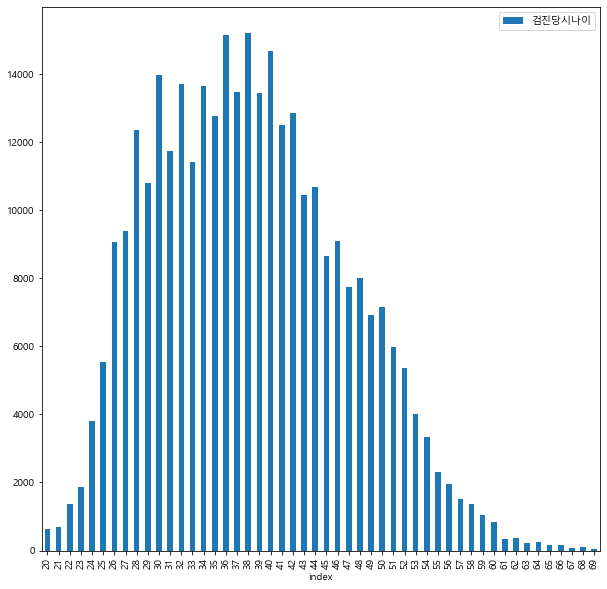

In [365]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [366]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,620
39,21,702
36,22,1365
33,23,1870
29,24,3801
26,25,5540
19,26,9055
17,27,9385
11,28,12357
14,29,10812


# 검진항목 시각화

In [367]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
count,328225.000000,3.282250e+05,3.282250e+05,328225.0,328225.000000,328225.000000,328225.000000,328225.000000,328225.000000,328225.000000,328225.000000,328225.000000,328225.000000,328225.000000,328225.000000,328225.000000,328225.000000
mean,2021.843266,5.019636e+05,1.510289e+06,2.0,38.224048,19.102696,14.962078,83.359623,16.594186,157.917703,87.375674,82.217663,91.505584,80.216066,101.056069,86.522575,93.262485
std,1.728061,3.692989e+05,8.022799e+05,0.0,8.482171,5.023514,6.937633,47.343226,8.871887,23.914666,41.231651,42.625429,48.888084,42.671424,37.638891,27.435329,13.720012
min,2010.000000,4.800000e+01,3.320000e+02,2.0,20.000000,5.000000,0.000000,30.000000,0.590000,78.000000,0.030000,0.000000,0.180000,0.000000,0.000000,1.930000,51.000000
25%,2021.000000,2.172100e+05,6.763070e+05,2.0,32.000000,16.000000,10.000000,48.000000,11.000000,145.000000,59.230000,50.460000,31.630000,46.950000,90.140000,68.160000,84.000000
50%,2022.000000,3.755580e+05,1.456677e+06,2.0,38.000000,18.000000,13.000000,67.000000,14.000000,157.700000,96.000000,91.710000,100.000000,93.050000,100.000000,88.820000,94.000000
75%,2023.000000,8.258990e+05,2.196388e+06,2.0,44.000000,22.000000,17.000000,104.000000,19.000000,163.000000,106.970000,104.450000,138.230000,104.110000,132.660000,105.800000,103.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,40.200000,56.000000,253.000000,72.000000,262.000000,200.000000,199.990000,150.070000,199.990000,150.020000,182.950000,141.000000


<AxesSubplot:xlabel='검진당시나이'>

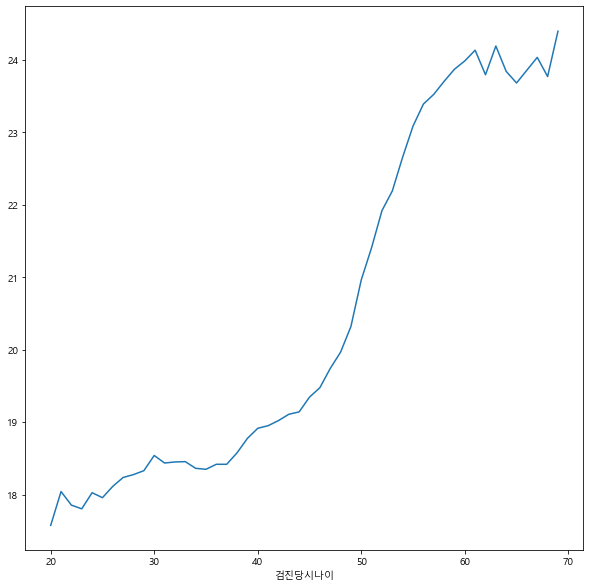

In [368]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

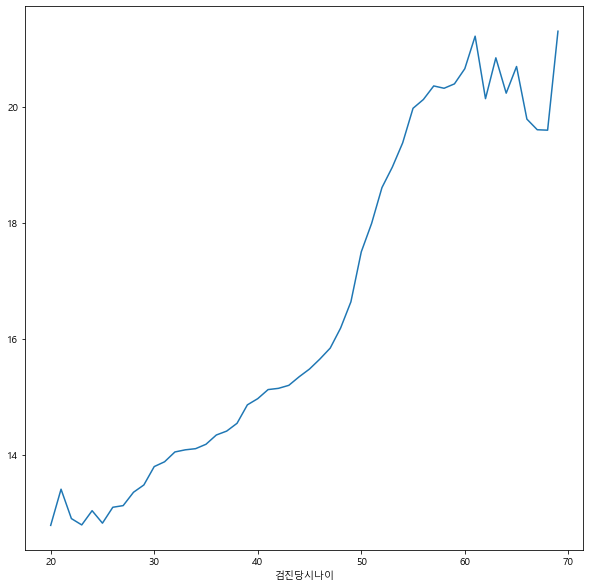

In [369]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

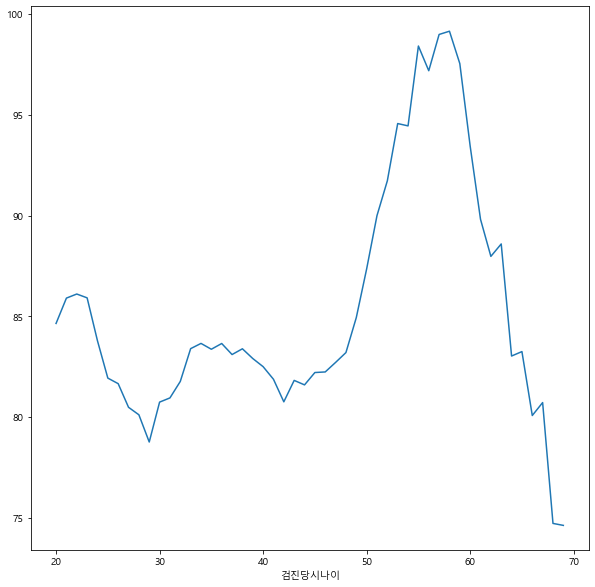

In [370]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

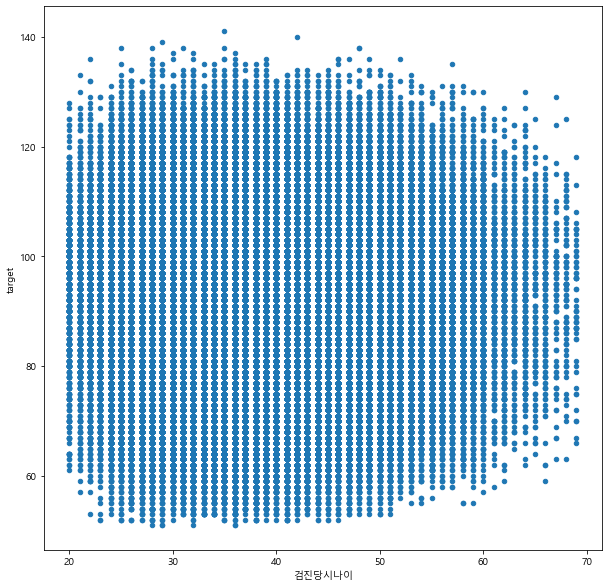

In [371]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

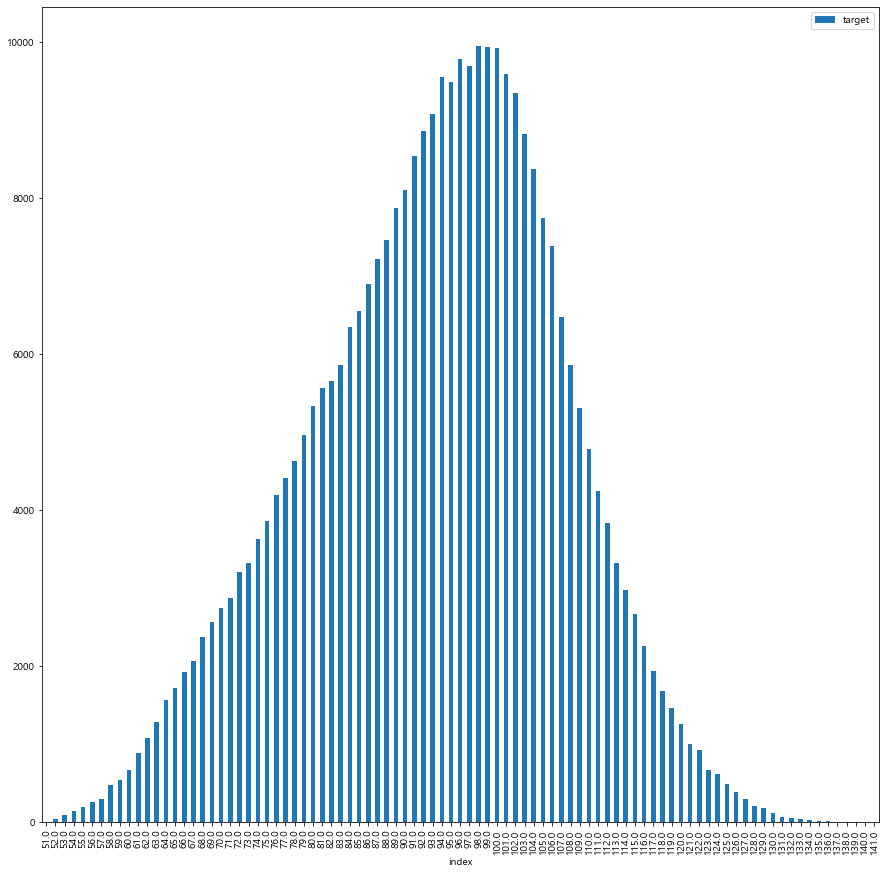

In [543]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [544]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
85,51.0,6
80,52.0,43
77,53.0,96
75,54.0,144
73,55.0,204
71,56.0,257
69,57.0,297
67,58.0,474
65,59.0,546
62,60.0,678


In [545]:
df_woman_sampling = pd.DataFrame()

for target in range(50, 100):
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [546]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

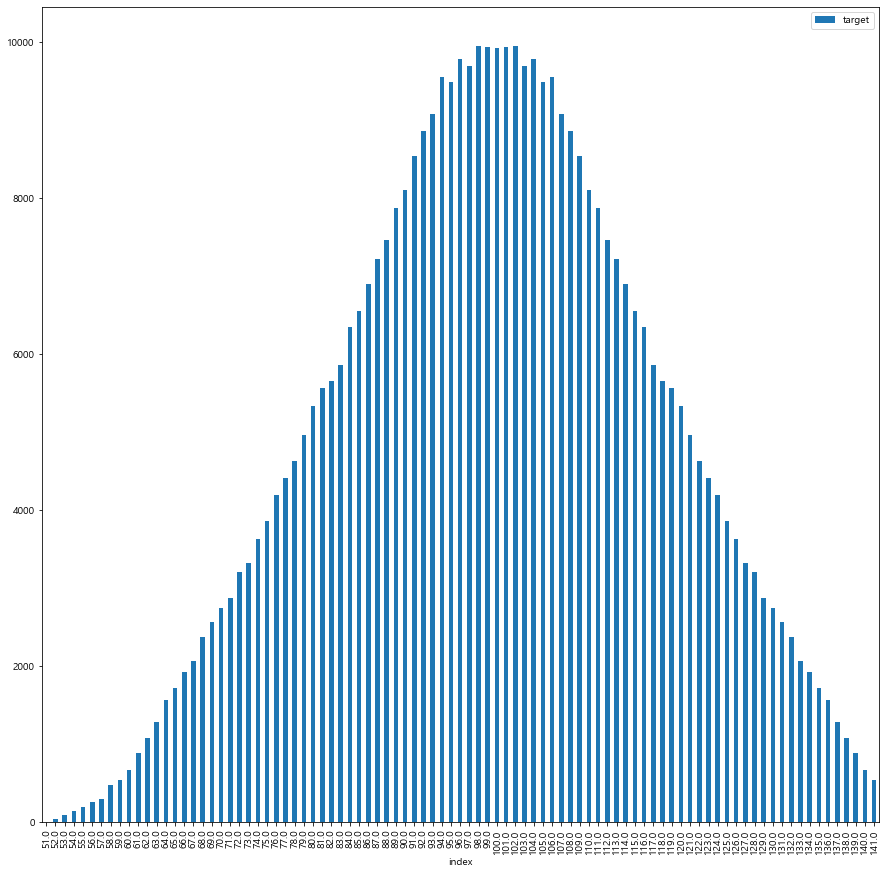

In [547]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [548]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
90,51.0,6
89,52.0,43
88,53.0,96
87,54.0,144
86,55.0,204
85,56.0,257
84,57.0,297
83,58.0,474
82,59.0,546
80,60.0,678


# 나이별 확인하기

In [549]:
# df_woman['검진당시나이'].value_counts()

In [550]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [551]:
# df_woman['검진당시나이'].min()

In [552]:
# df_woman['검진당시나이'].max()

In [553]:
# df_woman.columns

In [554]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [555]:
# df_temp.info()

In [556]:
# df_temp.reset_index(drop=True, inplace=True)

In [557]:
# df_woman = df_temp.copy()

In [558]:
# df_woman['검진당시나이'].value_counts()

In [559]:
# df_woman[df_woman['검진당시나이']==20]

In [560]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [561]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [562]:
train_columns

['검진당시나이', 'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [563]:
# target_col = '검진당시나이'

In [564]:
target_col

'target'

## Min Max Scaling

In [565]:
from sklearn.preprocessing import MinMaxScaler

In [566]:
scaling_bool

False

In [567]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [568]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [569]:
# model2 = LinearRegression()

In [570]:
# model2.fit(X_train2, y_train2)

In [571]:
# model2.intercept_

In [572]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [573]:
model2 = XGBRegressor()

In [574]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [575]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [405]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1912.06 seconds for 10 candidates parameter settings.


In [406]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [407]:
# best score
random_search.best_score_

-0.3541403543700362

In [408]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [409]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [410]:
# model = build_model()

In [411]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [412]:
# model.summary()

In [413]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [414]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [415]:
# plot_history(history)

## pyTorch 신경망

In [416]:
np.shape(X_train)[1]

6

In [417]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [418]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [419]:
# epochs = 1000

In [420]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [421]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [422]:
# plt.plot(losses)

## coef 계산

In [423]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [424]:
# df_coef2.columns = ['검사항목', 'coef']

In [425]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [426]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [427]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [428]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [429]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [430]:
# slr2 = LinearRegression()

In [431]:
# slr2.fit(X_train2_poly, y_train2)

In [432]:
# np.shape(X_train2)

In [433]:
# np.shape(X_train2_poly)

In [434]:
# np.shape(X_test2)

In [435]:
# np.shape(X_test2_poly)

In [436]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [437]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [438]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [439]:
import pickle
with open(model_path_woman,'wb') as f:
    pickle.dump(model2, f)

In [440]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [441]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [442]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [443]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.4471526963476424
MSE : 0.3476052951313454
RMSE : 0.5895806095279469


In [444]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9988213688221228

In [445]:
model2.score(X_test2, y_test2)

0.9988213688221228

## feature importance

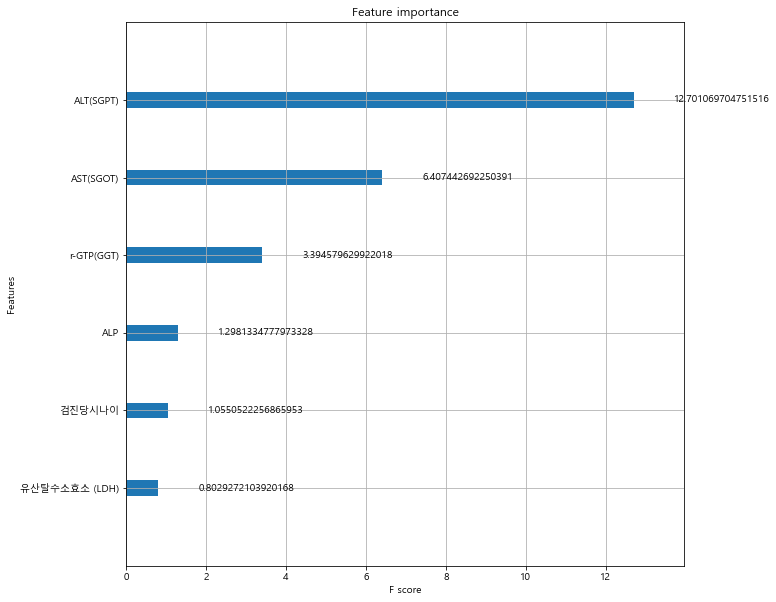

In [446]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [447]:
model2.feature_importances_

array([0.04111789, 0.24971323, 0.4949908 , 0.05059134, 0.13229482,
       0.03129198], dtype=float32)

In [448]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [449]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
2,ALT(SGPT),0.494991
1,AST(SGOT),0.249713
4,r-GTP(GGT),0.132295
3,ALP,0.050591
0,검진당시나이,0.041118
5,유산탈수소효소 (LDH),0.031292


# 실제나이 - 예측나이 결과

In [450]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [451]:
df_test2.head()

,target,0
0,103.0,103.553024
1,95.0,94.666588
2,112.0,111.363388
3,106.0,106.708488
4,105.0,105.077217


In [452]:
df_test2.columns

Index(['target', 0], dtype='object')

In [453]:
df_test2.columns = ['실제지수', '예측지수']

In [454]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [455]:
df_test2.head()

,실제지수,예측지수,diff
0,103.0,103.553024,0.553024
1,95.0,94.666588,-0.333412
2,112.0,111.363388,-0.636612
3,106.0,106.708488,0.708488
4,105.0,105.077217,0.077217


In [456]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [457]:
len(df_test2)

109005

In [458]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,103.0,103.553024,0.553024,1.0
1,95.0,94.666588,-0.333412,-0.0
2,112.0,111.363388,-0.636612,-1.0
3,106.0,106.708488,0.708488,1.0
4,105.0,105.077217,0.077217,0.0


<AxesSubplot:>

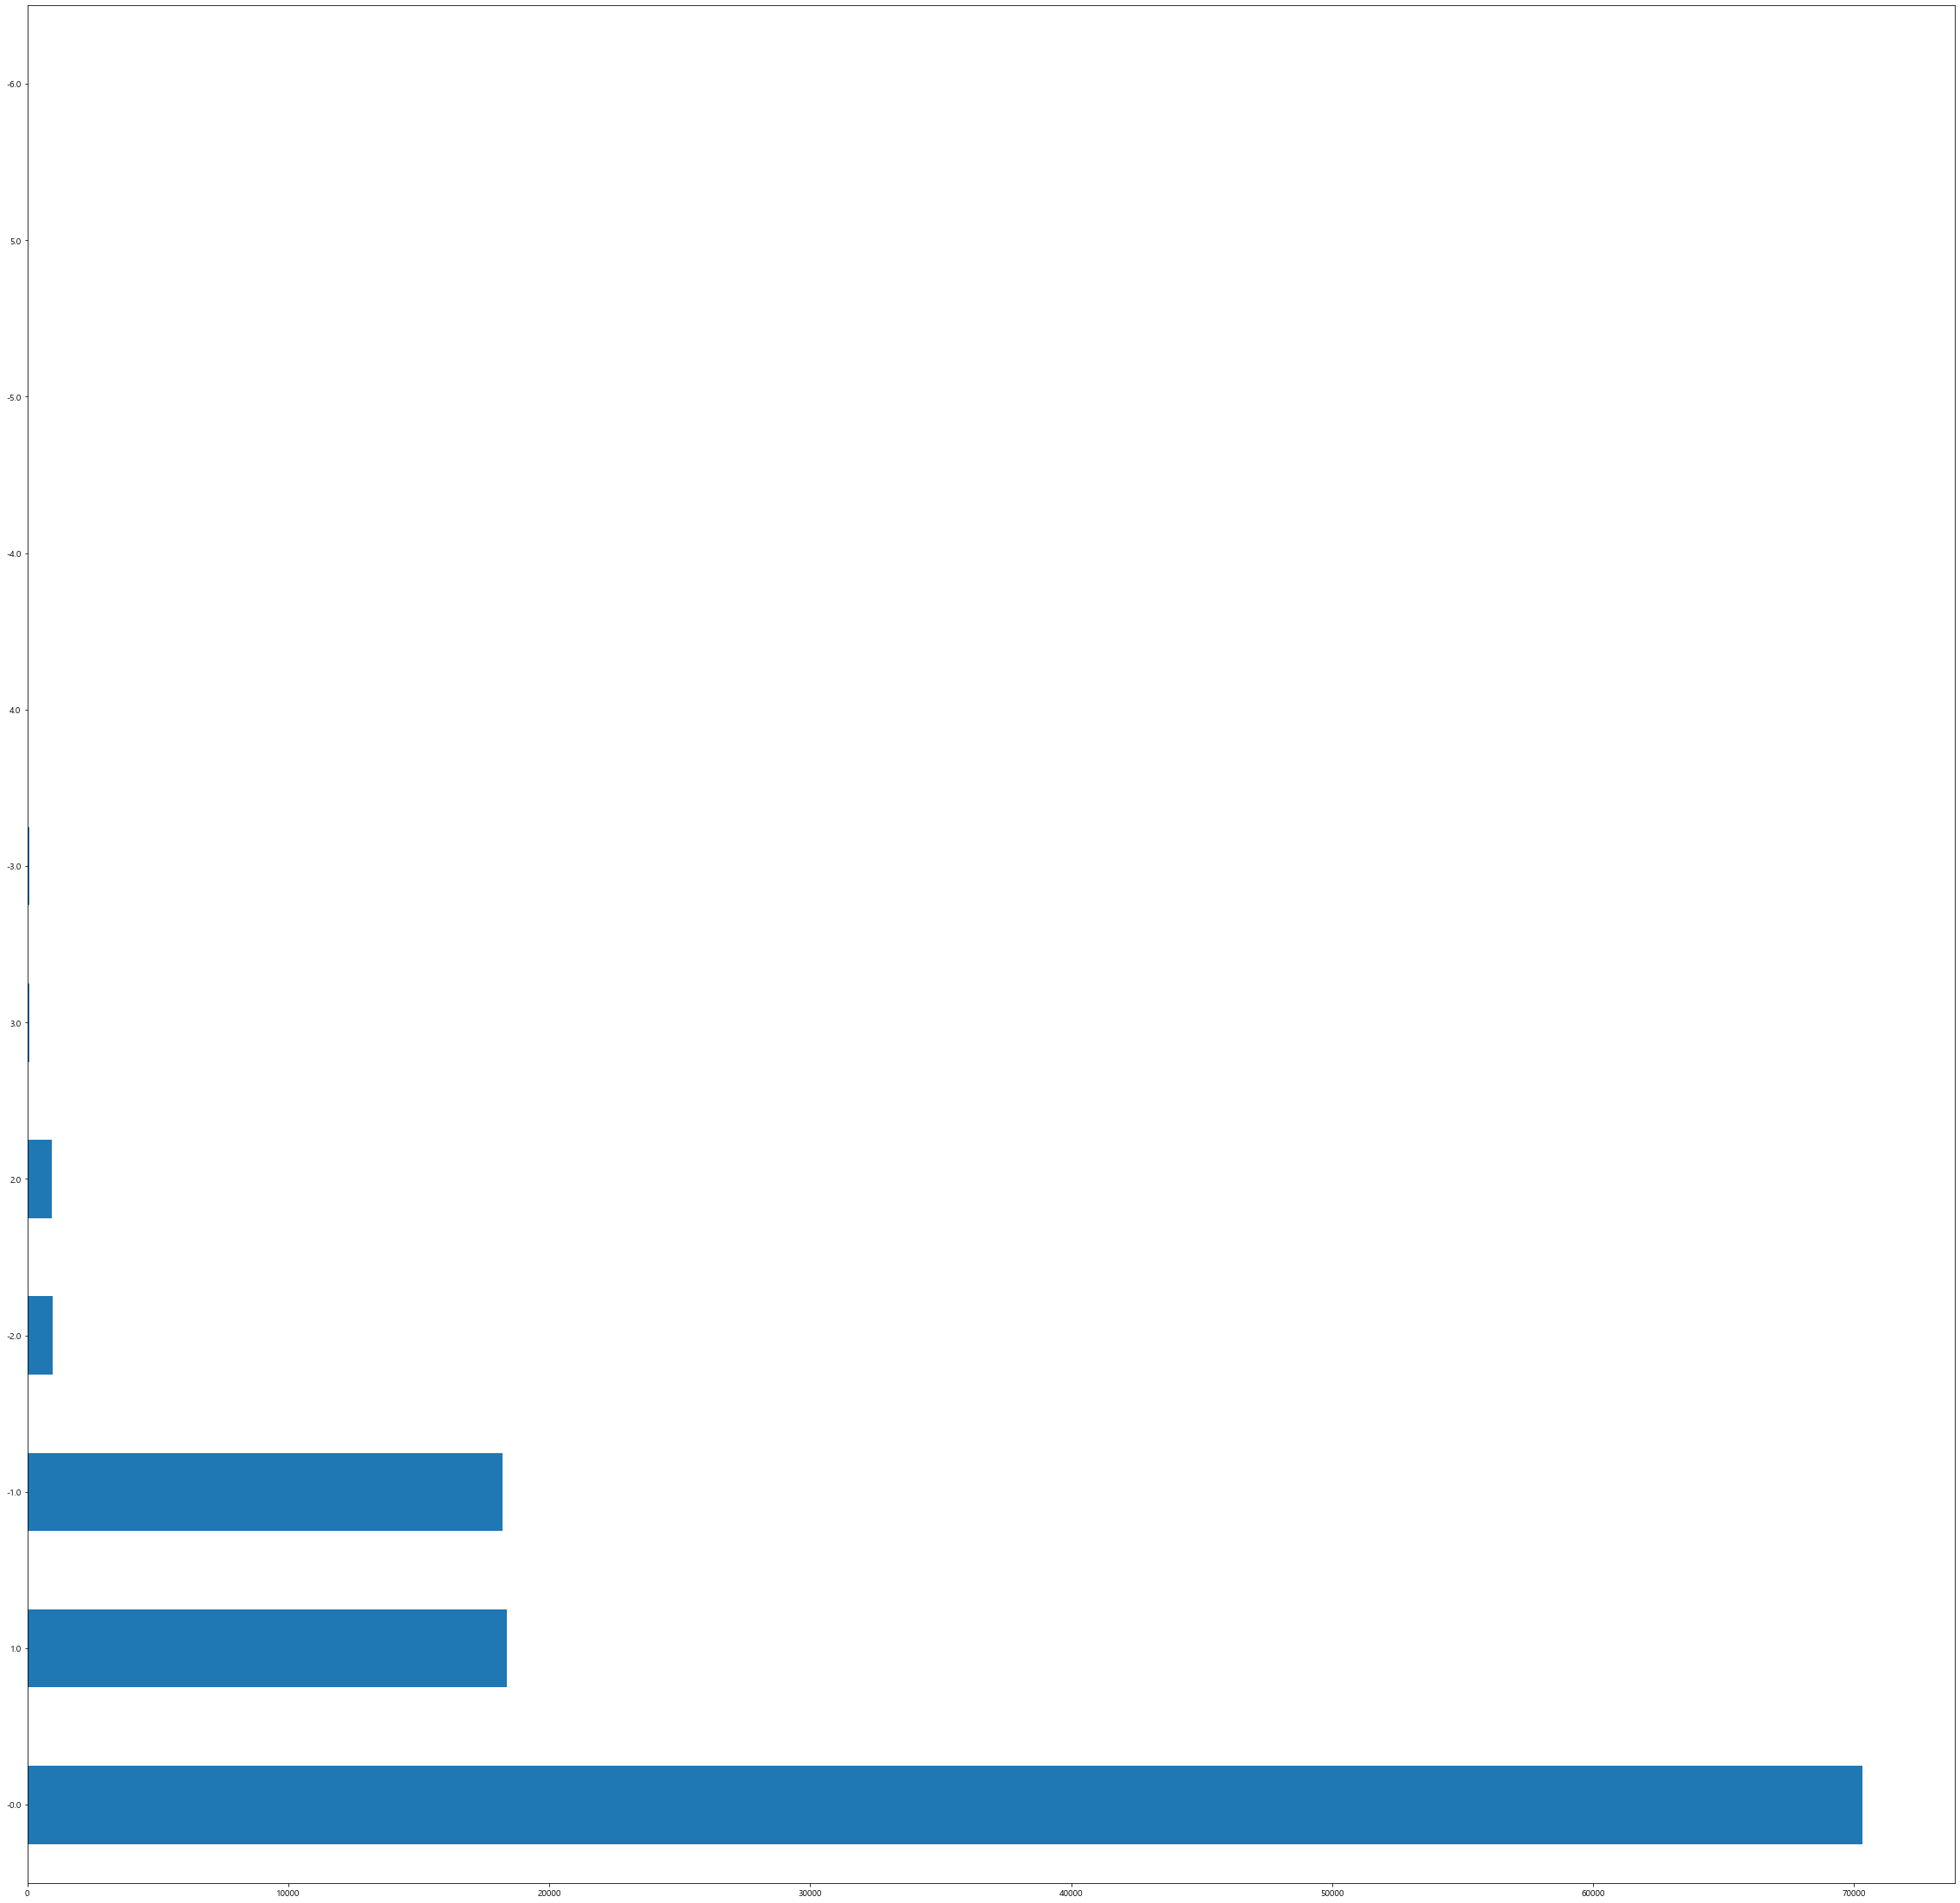

In [459]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [460]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [461]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [462]:
df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [463]:
df_train2.round(0).value_counts()

99.0     7530
102.0    7517
98.0     7476
103.0    7418
104.0    7367
101.0    7347
96.0     7298
105.0    7270
95.0     7245
100.0    7131
97.0     7104
94.0     7073
106.0    7047
93.0     6977
107.0    6891
108.0    6687
92.0     6665
109.0    6322
91.0     6270
90.0     6133
110.0    6084
89.0     5873
111.0    5830
88.0     5573
112.0    5566
87.0     5535
113.0    5490
114.0    5084
86.0     5073
85.0     4973
115.0    4881
116.0    4799
84.0     4736
118.0    4499
83.0     4434
117.0    4324
82.0     4260
81.0     4196
119.0    4131
80.0     3962
120.0    3943
79.0     3661
121.0    3630
123.0    3563
78.0     3525
122.0    3501
77.0     3257
124.0    3193
76.0     3165
75.0     2921
126.0    2854
125.0    2738
74.0     2718
72.0     2461
73.0     2430
128.0    2356
127.0    2320
71.0     2247
130.0    2128
129.0    2112
69.0     2002
131.0    1979
70.0     1933
132.0    1741
68.0     1739
133.0    1615
67.0     1600
134.0    1413
66.0     1396
65.0     1348
135.0    1314
136.0 

In [464]:
y_test2.value_counts()

100.0    2543
99.0     2528
102.0    2511
97.0     2502
101.0    2493
98.0     2487
96.0     2471
104.0    2427
106.0    2419
103.0    2374
95.0     2355
94.0     2345
105.0    2331
93.0     2274
108.0    2232
107.0    2202
92.0     2157
110.0    2137
91.0     2121
109.0    2080
89.0     2066
90.0     2028
111.0    1961
112.0    1899
113.0    1836
88.0     1813
87.0     1797
86.0     1711
85.0     1710
114.0    1661
115.0    1642
84.0     1563
116.0    1554
83.0     1469
117.0    1453
118.0    1400
119.0    1397
80.0     1393
82.0     1347
120.0    1346
81.0     1344
121.0    1229
79.0     1216
122.0    1156
78.0     1155
76.0     1083
77.0     1076
123.0    1061
124.0    1045
75.0      957
74.0      945
126.0     943
125.0     936
73.0      834
128.0     830
127.0     791
71.0      759
129.0     746
72.0      742
70.0      698
130.0     670
69.0      636
131.0     615
132.0     597
68.0      592
133.0     537
67.0      526
134.0     496
66.0      493
65.0      426
135.0     410
136.0 

In [465]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [466]:
df_plot.columns = ['count']

In [467]:
df_plot.reset_index(inplace=True)

In [468]:
df_plot = df_plot.sort_values('index', ascending=True)

In [469]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

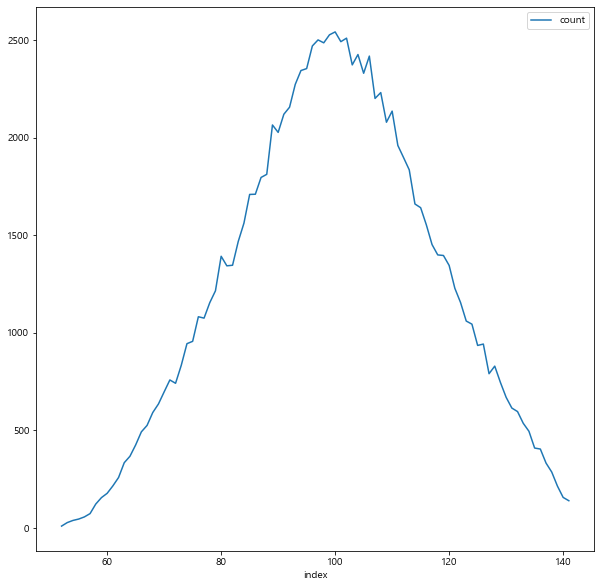

In [470]:
df_plot.plot()

In [471]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [472]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [473]:
df_test2.round(0).value_counts()

98.0     2554
101.0    2523
102.0    2510
99.0     2496
100.0    2473
97.0     2473
103.0    2430
96.0     2418
95.0     2402
106.0    2396
105.0    2396
94.0     2386
104.0    2379
93.0     2295
107.0    2259
108.0    2170
92.0     2120
110.0    2100
90.0     2090
109.0    2090
91.0     2071
89.0     2027
111.0    1984
112.0    1911
113.0    1837
87.0     1823
88.0     1795
85.0     1717
86.0     1712
114.0    1650
116.0    1606
84.0     1605
115.0    1582
118.0    1475
117.0    1405
83.0     1403
80.0     1396
119.0    1387
82.0     1379
120.0    1346
81.0     1331
79.0     1223
121.0    1190
123.0    1158
122.0    1129
78.0     1121
77.0     1100
76.0     1053
124.0    1043
75.0     1023
126.0     978
125.0     922
74.0      895
73.0      829
128.0     825
71.0      761
72.0      755
129.0     734
127.0     712
70.0      690
130.0     673
69.0      647
131.0     637
67.0      585
132.0     574
68.0      568
133.0     566
134.0     495
65.0      456
66.0      444
135.0     410
136.0 

In [474]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [475]:
df_plot2.columns = ['count']

In [476]:
df_plot2.reset_index(inplace=True)

In [477]:
df_plot2

,0,count
0,98.0,2554
1,101.0,2523
2,102.0,2510
3,99.0,2496
4,100.0,2473
5,97.0,2473
6,103.0,2430
7,96.0,2418
8,95.0,2402
9,106.0,2396


In [478]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [479]:
df_plot2.set_index(0, inplace=True)

In [480]:
df_plot2

,count
0,
51.0,1
52.0,7
53.0,35
54.0,34
55.0,44
56.0,60
57.0,66
58.0,128
59.0,144


<AxesSubplot:xlabel='0'>

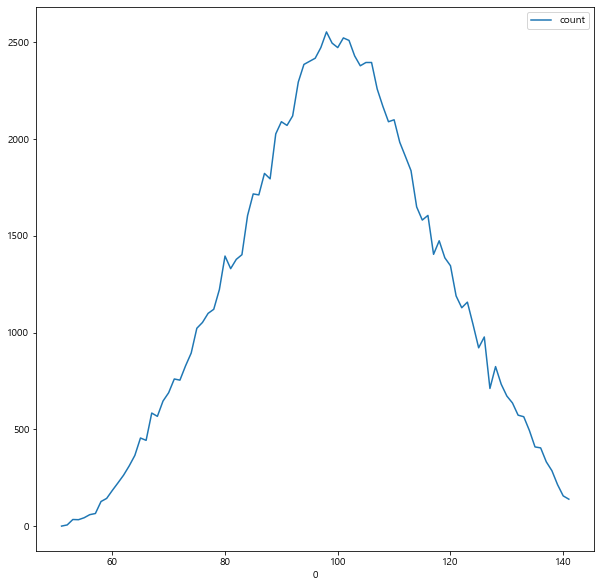

In [481]:
df_plot2.plot()

# 시각화

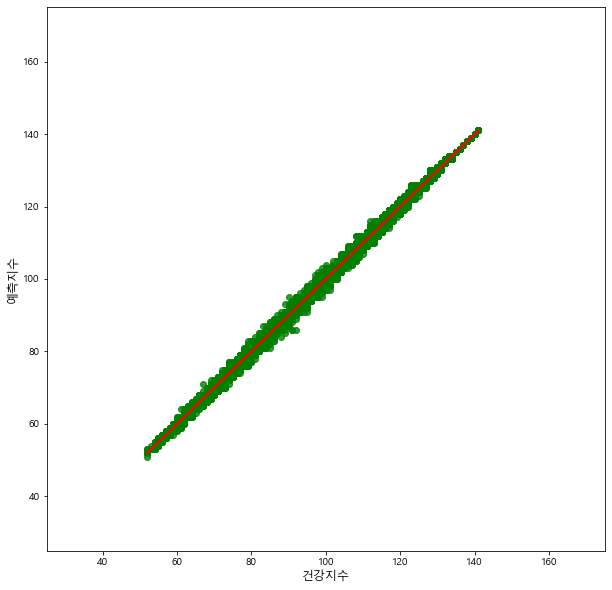

In [482]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [483]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
0,2022,48,1140655,2,34,20.0,30.0,82.36,50.0,157.7,69.20,3.74,100.00,1.11,100.00,43.51,72.0
1,2021,53,2632765,2,26,18.0,16.0,47.00,10.0,174.0,92.34,46.71,149.63,117.17,61.00,90.38,95.0
2,2023,53,2632764,2,28,19.0,15.0,82.36,12.0,157.7,84.46,57.74,100.00,100.00,100.00,85.55,93.0
3,2024,53,2658222,2,29,16.0,9.0,51.00,10.0,172.0,100.00,109.75,145.01,113.69,73.98,108.23,104.0
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.0,104.51,85.69,23.69,131.71,105.56,96.63,98.0


In [484]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328225 entries, 0 to 328224
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   검진년도               328225 non-null  int64  
 1   UID                328225 non-null  int64  
 2   CU_REC_ID          328225 non-null  int64  
 3   SEX                328225 non-null  int64  
 4   검진당시나이             328225 non-null  int64  
 5   AST(SGOT)          328225 non-null  float64
 6   ALT(SGPT)          328225 non-null  float64
 7   ALP                328225 non-null  float64
 8   r-GTP(GGT)         328225 non-null  float64
 9   유산탈수소효소 (LDH)      328225 non-null  float64
 10  AST(SGOT)_kde      328225 non-null  float64
 11  ALT(SGPT)_kde      328225 non-null  float64
 12  ALP_kde            328225 non-null  float64
 13  r-GTP(GGT)_kde     328225 non-null  float64
 14  유산탈수소효소 (LDH)_kde  328225 non-null  float64
 15  kde_mean           328225 non-null  float64
 16  ta

In [485]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target
69469,2021,196909,2495703,2,28,18.0,9.0,40.0,11.0,150.0,92.94,109.87,135.65,103.02,146.28,111.70,106.0
69470,2022,196909,2495702,2,29,18.0,10.0,48.0,10.0,149.0,84.18,100.29,149.67,113.69,149.83,111.98,106.0
69471,2023,196909,2495700,2,30,18.0,18.0,34.0,13.0,127.0,96.88,32.95,99.70,97.90,91.45,80.83,90.0
69472,2024,196909,2495697,2,31,15.0,8.0,46.0,10.0,149.0,109.63,135.77,149.41,114.47,144.55,126.71,113.0


In [486]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [487]:
len(df_pred2)

328225

In [488]:
df_pred2.reset_index(drop=True, inplace=True)

In [489]:
X_test2

,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
293774,35,17.0,7.0,44.00,22.0,152.0
72027,30,15.0,14.0,33.00,16.0,134.0
138452,28,14.0,11.0,39.00,9.0,146.0
317659,36,17.0,12.0,66.00,9.0,148.0
318124,42,19.0,14.0,58.00,8.0,170.0
...,...,...,...,...,...,...
53266,36,13.0,6.0,37.00,11.0,128.0
182381,43,22.0,18.0,82.36,13.0,157.7
10537,43,18.0,31.0,82.36,27.0,133.0
137028,57,23.0,25.0,108.00,18.0,207.0


In [490]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'AST(SGOT)', 'ALT(SGPT)',
       'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', 'AST(SGOT)_kde', 'ALT(SGPT)_kde',
       'ALP_kde', 'r-GTP(GGT)_kde', '유산탈수소효소 (LDH)_kde', 'kde_mean', 'target'],
      dtype='object')

In [491]:
df_pred2[train_columns]

,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,34,20.0,30.0,82.36,50.0,157.7
1,26,18.0,16.0,47.00,10.0,174.0
2,28,19.0,15.0,82.36,12.0,157.7
3,29,16.0,9.0,51.00,10.0,172.0
4,30,16.0,13.0,84.00,9.0,130.0
...,...,...,...,...,...,...
328220,60,29.0,25.0,82.36,18.0,157.7
328221,62,24.0,16.0,82.36,19.0,157.7
328222,56,21.0,12.0,55.00,16.0,191.0
328223,30,29.0,27.0,82.36,14.0,157.7


In [492]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [493]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [494]:
pred_data2

array([ 71.821045,  94.75434 ,  92.96089 , ..., 105.61068 ,  75.55339 ,
       102.719345], dtype=float32)

In [495]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [496]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [497]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수
0,2022,48,1140655,2,34,20.0,30.0,82.36,50.0,157.7,69.20,3.74,100.00,1.11,100.00,43.51,72.0,71.821045
1,2021,53,2632765,2,26,18.0,16.0,47.00,10.0,174.0,92.34,46.71,149.63,117.17,61.00,90.38,95.0,94.754341
2,2023,53,2632764,2,28,19.0,15.0,82.36,12.0,157.7,84.46,57.74,100.00,100.00,100.00,85.55,93.0,92.960892
3,2024,53,2658222,2,29,16.0,9.0,51.00,10.0,172.0,100.00,109.75,145.01,113.69,73.98,108.23,104.0,102.991249
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.0,104.51,85.69,23.69,131.71,105.56,96.63,98.0,97.979782
5,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.0,112.44,97.33,2.07,68.42,147.11,88.20,94.0,93.892143
6,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.0,100.80,91.17,10.12,95.71,126.67,89.02,95.0,93.875084
7,2024,54,2750990,2,34,24.0,22.0,69.00,12.0,156.0,27.99,16.11,79.92,100.00,132.47,62.57,81.0,80.889923
8,2019,56,1605927,2,30,17.0,10.0,82.36,15.0,157.7,100.00,103.81,100.00,78.06,100.00,95.47,98.0,97.613342
9,2020,56,1605928,2,31,17.0,9.0,82.36,15.0,157.7,100.00,116.93,100.00,75.22,100.00,98.04,99.0,98.075279


## 예측지수 성능평가

In [498]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.47593642506253303

# target으로 나이 계산

In [499]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [500]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,20.0,30.0,82.36,50.0,157.7,69.20,3.74,100.00,1.11,100.00,43.51,72.0,71.821045,39.64
1,2021,53,2632765,2,26,18.0,16.0,47.00,10.0,174.0,92.34,46.71,149.63,117.17,61.00,90.38,95.0,94.754341,27.05
2,2023,53,2632764,2,28,19.0,15.0,82.36,12.0,157.7,84.46,57.74,100.00,100.00,100.00,85.55,93.0,92.960892,29.41
3,2024,53,2658222,2,29,16.0,9.0,51.00,10.0,172.0,100.00,109.75,145.01,113.69,73.98,108.23,104.0,102.991249,28.40
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.0,104.51,85.69,23.69,131.71,105.56,96.63,98.0,97.979782,30.40
5,2022,54,1319859,2,32,15.0,12.0,244.00,15.0,137.0,112.44,97.33,2.07,68.42,147.11,88.20,94.0,93.892143,33.22
6,2023,54,2039511,2,33,16.0,13.0,207.00,13.0,135.0,100.80,91.17,10.12,95.71,126.67,89.02,95.0,93.875084,34.22
7,2024,54,2750990,2,34,24.0,22.0,69.00,12.0,156.0,27.99,16.11,79.92,100.00,132.47,62.57,81.0,80.889923,37.82
8,2019,56,1605927,2,30,17.0,10.0,82.36,15.0,157.7,100.00,103.81,100.00,78.06,100.00,95.47,98.0,97.613342,30.48
9,2020,56,1605928,2,31,17.0,9.0,82.36,15.0,157.7,100.00,116.93,100.00,75.22,100.00,98.04,99.0,98.075279,31.38


## 예측나이 성능평가

In [501]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

2.3901212887500947

# 최종 산출

In [502]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),AST(SGOT)_kde,ALT(SGPT)_kde,ALP_kde,r-GTP(GGT)_kde,유산탈수소효소 (LDH)_kde,kde_mean,target,예측지수,예측나이
0,2022,48,1140655,2,34,20.0,30.0,82.36,50.0,157.7,69.20,3.74,100.00,1.11,100.00,43.51,72.0,71.821045,39.64
1,2021,53,2632765,2,26,18.0,16.0,47.00,10.0,174.0,92.34,46.71,149.63,117.17,61.00,90.38,95.0,94.754341,27.05
2,2023,53,2632764,2,28,19.0,15.0,82.36,12.0,157.7,84.46,57.74,100.00,100.00,100.00,85.55,93.0,92.960892,29.41
3,2024,53,2658222,2,29,16.0,9.0,51.00,10.0,172.0,100.00,109.75,145.01,113.69,73.98,108.23,104.0,102.991249,28.40
4,2020,54,497669,2,30,16.0,13.0,84.00,9.0,130.0,104.51,85.69,23.69,131.71,105.56,96.63,98.0,97.979782,30.40


In [503]:
# df_output2.to_csv('woman.csv')

# DataMart csv

In [504]:
df_copy = df.copy()

In [505]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
0,2010,7282,2520,1,42,20.0,21.0,63.0,22.0,165.0
1,2010,7490,3638,1,39,25.0,40.0,164.0,65.0,298.0
2,2010,7915,3997,1,36,19.0,17.0,184.0,66.0,241.0
3,2010,8056,4745,1,42,33.0,39.0,165.0,157.0,315.0
4,2010,8457,3929,1,38,28.0,18.0,147.0,27.0,350.0


In [506]:
minimums

[4.5, -11.5, -67.0, -19.5, 78.0]

In [507]:
maximums

[40.5, 56.5, 253.0, 72.5, 262.0]

In [508]:
train_columns

['검진당시나이', 'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [509]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [510]:
for idx, col in enumerate(target_cols):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [511]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [512]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
10,2010,15894,2533,2,29,21.0,13.0,104.0,15.0,NaN
22,2010,42223,1364,2,24,20.0,11.0,140.0,37.0,NaN
37,2011,364096,6645,2,32,20.0,14.0,137.0,11.0,NaN
45,2010,120518,3595,2,30,19.0,14.0,122.0,15.0,262.0
63,2011,698706,6600,2,36,14.0,15.0,NaN,16.0,NaN


## 검진 항목 all 결측치 지우기

In [513]:
target_cols

['AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)']

In [514]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [515]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [516]:
len(df_woman_csv)

446492

## fillna

In [517]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## ALP 스크리닝

In [518]:
screening = 30

In [519]:
df_woman_csv[df_woman_csv['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)
165,2010,706074,3749,2,30,25.0,11.0,28.0,12.0,157.92
8364,2019,69,1484771,2,33,26.0,13.0,28.0,11.0,201.00
8399,2019,34828,2185591,2,36,13.0,11.0,26.0,9.0,157.92
8449,2019,7645,423310,2,33,19.0,13.0,27.0,6.0,157.92
8497,2019,7998,325153,2,30,12.0,11.0,26.0,9.0,128.00


In [520]:
len(df_woman_csv[df_woman_csv['ALP'] < screening])

5110

In [521]:
df_woman_csv.loc[df_woman_csv['ALP'] < screening, 'ALP'] = screening

In [522]:
df_woman_csv[df_woman_csv['ALP'] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH)


In [523]:
len(df_woman_csv[df_woman_csv['ALP'] < screening])

0

In [524]:
len(df_woman_csv)

446492

## 모델 예측

In [525]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [526]:
pred_data2 = pred_data2.round(0)

In [527]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [528]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수
0,2010,15894,2533,2,29,21.0,13.0,104.00,15.0,157.92,84.0
1,2010,42223,1364,2,24,20.0,11.0,140.00,37.0,157.92,80.0
2,2011,364096,6645,2,32,20.0,14.0,137.00,11.0,157.92,90.0
3,2010,120518,3595,2,30,19.0,14.0,122.00,15.0,262.00,83.0
4,2011,698706,6600,2,36,14.0,15.0,83.36,16.0,157.92,93.0


### 성능 평가

In [529]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [530]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [531]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [532]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 2.645361171084813


In [533]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.8426298988274691

In [534]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
0,2010,15894,2533,2,29,21.0,13.0,104.00,15.0,157.92,84.0,32.2
1,2010,42223,1364,2,24,20.0,11.0,140.00,37.0,157.92,80.0,28.0
2,2011,364096,6645,2,32,20.0,14.0,137.00,11.0,157.92,90.0,34.0
3,2010,120518,3595,2,30,19.0,14.0,122.00,15.0,262.00,83.0,33.4
4,2011,698706,6600,2,36,14.0,15.0,83.36,16.0,157.92,93.0,37.4


In [535]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446492 entries, 0 to 446491
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   검진년도           446492 non-null  int64  
 1   UID            446492 non-null  int64  
 2   CU_REC_ID      446492 non-null  int64  
 3   SEX            446492 non-null  int64  
 4   검진당시나이         446492 non-null  int64  
 5   AST(SGOT)      446492 non-null  float64
 6   ALT(SGPT)      446492 non-null  float64
 7   ALP            446492 non-null  float64
 8   r-GTP(GGT)     446492 non-null  float64
 9   유산탈수소효소 (LDH)  446492 non-null  float64
 10  예측지수           446492 non-null  float32
 11  예측나이           446492 non-null  float64
dtypes: float32(1), float64(6), int64(5)
memory usage: 39.2 MB


# 최종 UID별 확인

In [536]:
# 성..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
126634,2021,261581,806568,2,50,24.0,23.0,60.0,18.0,177.0,87.0,52.6
126643,2021,261581,2243879,2,50,24.0,23.0,60.0,18.0,177.0,87.0,52.6
126644,2021,261581,2418909,2,50,24.0,23.0,60.0,18.0,177.0,87.0,52.6
126645,2021,261581,2418910,2,50,24.0,23.0,60.0,18.0,177.0,87.0,52.6
191821,2022,261581,751339,2,51,23.0,26.0,71.0,69.0,179.0,76.0,55.8
191824,2022,261581,2243878,2,51,23.0,26.0,71.0,69.0,179.0,76.0,55.8
286833,2023,261581,1519764,2,52,27.0,24.0,68.0,18.0,177.0,89.0,54.2
286834,2023,261581,2243877,2,52,27.0,24.0,68.0,18.0,177.0,89.0,54.2
411733,2024,261581,2418911,2,53,17.0,13.0,60.0,17.0,162.0,109.0,51.2


In [537]:
# 차..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
66922,2022,477944,956268,2,31,19.0,11.0,30.0,24.0,120.0,82.0,34.6
224794,2022,477944,2212776,2,31,19.0,11.0,30.0,24.0,120.0,82.0,34.6
332936,2023,477944,1454346,2,32,12.0,9.0,31.0,23.0,121.0,98.0,32.4
332937,2023,477944,2212775,2,32,12.0,9.0,31.0,23.0,121.0,98.0,32.4
424159,2024,477944,2362855,2,33,20.0,16.0,35.0,22.0,123.0,79.0,37.2


In [538]:
# 성혜..
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,AST(SGOT),ALT(SGPT),ALP,r-GTP(GGT),유산탈수소효소 (LDH),예측지수,예측나이
358956,2023,896916,1459636,2,28,20.0,15.0,64.0,12.0,161.0,92.0,29.6
358945,2023,896916,1842092,2,28,20.0,15.0,64.0,12.0,161.0,92.0,29.6
358957,2023,896916,2031853,2,28,20.0,15.0,64.0,12.0,161.0,92.0,29.6
358958,2023,896916,2253054,2,28,20.0,15.0,64.0,12.0,161.0,92.0,29.6
352927,2023,896916,2257188,2,28,20.0,15.0,64.0,12.0,161.0,92.0,29.6
435106,2024,896916,2253058,2,29,14.0,11.0,55.0,13.0,150.0,108.0,27.4


# 최종 CSV 병합 Extract

In [539]:
len(df_man_csv)

761917

In [540]:
len(df_woman_csv)

446492

In [541]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [542]:
df_csv.to_csv(csv_path)